## In this notebook we import all the csv for the experiments on how the IC-MAP-Elites adapt overtime.
In this notebook we import all the different csv files stored for the expressive range test, create the respective folders and create all the plots related to eac pair of dimensions, and we plot leniency/linearity.

In [1]:
import numpy as np; np.random.seed(0)
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
import os as os
import os.path
from os import path
from numpy import genfromtxt
from os import listdir
import matplotlib as mpl
import math
import scipy.stats

Read all the CSV that exist in the specified folder... Create all the folders for each csv

### Change this based on your location

In [18]:
rootDir = 'C:/Users/alvar/projects/eclipse-workspace/eddy/my-data/Basic-room/'
csvDirectories = ['C:/Users/alvar/projects/eclipse-workspace/eddy/my-data/Basic-room/']
# csvDirectories = ['C:/Users/alvar/projects/eclipse-workspace/eddy/my-data/complex-room/']

# for expDir in listdir(rootDir):
#     csvDirectories.append(os.path.join(rootDir, expDir) + '/')
    
# # del csvDirectories[1:]
    
print(len(csvDirectories))

1


In [ ]:
filenames = listdir(CSVFilesDirectory)
csvFiles = [ filename for filename in filenames if filename.endswith( ".csv" ) ]
print(csvFiles)

In [4]:
def getCSVFiles(directory):
    filenames = listdir(directory)
    csvFiles = [ filename for filename in filenames if filename.endswith( ".csv" ) ]
    return csvFiles

In [5]:
customColor = mpl.colors.LinearSegmentedColormap.from_list('custom', 
                                             [(0,    [0.13,0.13,0.13]),
                                              (1,    'white')], N=126)

In [6]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

def hexbin(x, y, color, data,  max_series=None, min_series=None, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    ax = plt.gca()
    #print(data)
    #print(data[x].shape)
    print(x.shape)
    #print(x.name)
    #xmin, xmax = min_series[x.name], max_series[x.name]
    xmin, xmax = -0.1,1.1
    ymin, ymax = -0.1, 1.1
    #ax.fig.subplots_adjust(left=0.07, right=0.93, top=0.9, bottom=0.1)  # shrink fig so cbar is visible
    #ax.apply_aspect(left=0.07, right=0.93, top=0.9, bottom=0.1)
    a=ax.hexbin(x, y, gridsize=20, cmap=customColor, extent=[xmin, xmax, ymin, ymax], mincnt=1, **kwargs)
    
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    #cax = divider.append_axes("bottom", size="5%", pad=0.05)

    plt.colorbar(a, cax=cax)

    #cbar_ax = a.get_figure().add_axes([.97, .2, .03, .5])  # x, y, width, height
    #plt.colorbar(a)

In [7]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

def hexbinCUSTOM(ax, x, y, color, data,  max_series=None, min_series=None, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    #ax = plt.gca()
    #print(data)
    #print(x.name)
    #xmin, xmax = min_series[x.name], max_series[x.name]
    xmin, xmax = -0.1,1.1
    ymin, ymax = -0.1, 1.1
    #print(len(data[x]))
    #ax.fig.subplots_adjust(left=0.07, right=0.93, top=0.9, bottom=0.1)  # shrink fig so cbar is visible
    #ax.apply_aspect(left=0.07, right=0.93, top=0.9, bottom=0.1)
    a=ax.hexbin(data[x], data[y], gridsize=20, cmap=customColor, extent=[xmin, xmax, ymin, ymax], mincnt=1, **kwargs)
    ax.axis([xmin, xmax, ymin, ymax])
    
    ax.set(ylim=(-0.1, 1.1), yticks=[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]);
    ax.set(xlim=(-0.1, 1.1), xticks=[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]);
    
    #plt.subplots_adjust(left=0.07, right=0.93, top=0.9, bottom=0.1)  # shrink fig so cbar is visible
    #cbar_ax = fitness_figure.fig.add_axes([.97, .2, .03, .5])  # x, y, width, height
    #plt.colorbar(cax=cbar_ax)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    #return a
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    #cax = divider.append_axes("bottom", size="5%", pad=0.05)

    plt.colorbar(a,cax=cax)

    #cbar_ax = a.get_figure().add_axes([.97, .2, .03, .5])  # x, y, width, height
    #plt.colorbar(a)

In [8]:
class experimentData():
    def __init__(self):
        self.experiment_data = {}
        self.experiment_data.update({'room':[]})
        self.experiment_data.update({'DimX':[]})
        self.experiment_data.update({'DimY':[]})
        self.experiment_data.update({'CurDimX':[]})
        self.experiment_data.update({'CurDimY':[]})
        self.experiment_data.update({'FinalCovered':[]})
        self.experiment_data.update({'NormaleTotalCovered':[]})
        self.experiment_data.update({'MesoPatternCoveredTotal':[]})
        self.experiment_data.update({'ActualTotalCovered':[]})
        self.experiment_data.update({'ActualMesoTotalCovered':[]})
        self.experiment_data.update({'AvgFitness':[]})
        self.experiment_data.update({'uniqueCreated':[]})
        self.experiment_data.update({'percentageCovered':[]})
        self.experiment_data.update({'PercentageMesoCovered':[]})
        self.experiment_data.update({'step':[]})
        self.experiment_data.update({'growth':[]})
    
    def addDataPoint(self, mainRoom, dimx, dimy, curr_dimx, curr_dimy, covered_bins, avg_fitness, unique_created, percCover, percCoverMeso, step, growth):
        self.experiment_data['room'].append(mainRoom)
        self.experiment_data['DimX'].append(dimx)
        self.experiment_data['DimY'].append(dimy)
        self.experiment_data['CurDimX'].append(curr_dimx)
        self.experiment_data['CurDimY'].append(curr_dimy)
        self.experiment_data['FinalCovered'].append(covered_bins)
        self.experiment_data['NormaleTotalCovered'].append(368)
        self.experiment_data['MesoPatternCoveredTotal'].append(122)
        self.experiment_data['ActualTotalCovered'].append(472)
        self.experiment_data['ActualMesoTotalCovered'].append(140)
        self.experiment_data['AvgFitness'].append(avg_fitness)
        self.experiment_data['uniqueCreated'].append(unique_created)
        self.experiment_data['percentageCovered'].append(percCover)
        self.experiment_data['PercentageMesoCovered'].append(percCoverMeso)
        self.experiment_data['step'].append(step)
        self.experiment_data['growth'].append(growth)
        
    def getData(self):
        return self.experiment_data

In [9]:
class fitnessData():
    def __init__(self):
        self.experiment_data = {}
        self.experiment_data.update({'STEP':[]})
        self.experiment_data.update({'AVG LIN':[]})
        self.experiment_data.update({'AVG LEN':[]})
        self.experiment_data.update({'AVG SYM':[]})
        self.experiment_data.update({'AVG MESO':[]})
        self.experiment_data.update({'AVG SPA':[]})
        self.experiment_data.update({'AVG SIM':[]})
        self.experiment_data.update({'AVG IS':[]})
        self.experiment_data.update({'AVG FIT':[]})
        self.experiment_data.update({'MAX FIT':[]})
        self.experiment_data.update({'CurDimY':[]})
        self.experiment_data.update({'FinalCovered':[]})
        self.experiment_data.update({'NormaleTotalCovered':[]})
        self.experiment_data.update({'MesoPatternCoveredTotal':[]})
        self.experiment_data.update({'AVG FIT':[]})
        self.experiment_data.update({'ActualMesoTotalCovered':[]})
        self.experiment_data.update({'AvgFitness':[]})
        self.experiment_data.update({'uniqueCreated':[]})
        self.experiment_data.update({'percentageCovered':[]})
        self.experiment_data.update({'PercentageMesoCovered':[]})
        self.experiment_data.update({'step':[]})
        self.experiment_data.update({'growth':[]})
    
    def addDataPoint(self, mainRoom, dimx, dimy, curr_dimx, curr_dimy, covered_bins, avg_fitness, unique_created, percCover, percCoverMeso, step, growth):
        self.experiment_data['room'].append(mainRoom)
        self.experiment_data['DimX'].append(dimx)
        self.experiment_data['DimY'].append(dimy)
        self.experiment_data['CurDimX'].append(curr_dimx)
        self.experiment_data['CurDimY'].append(curr_dimy)
        self.experiment_data['FinalCovered'].append(covered_bins)
        self.experiment_data['NormaleTotalCovered'].append(368)
        self.experiment_data['MesoPatternCoveredTotal'].append(122)
        self.experiment_data['ActualTotalCovered'].append(472)
        self.experiment_data['ActualMesoTotalCovered'].append(140)
        self.experiment_data['AvgFitness'].append(avg_fitness)
        self.experiment_data['uniqueCreated'].append(unique_created)
        self.experiment_data['percentageCovered'].append(percCover)
        self.experiment_data['PercentageMesoCovered'].append(percCoverMeso)
        self.experiment_data['step'].append(step)
        self.experiment_data['growth'].append(growth)
        
    def getData(self):
        return self.experiment_data

In [15]:
class fitnessData():
    def __init__(self):
        self.experiment_data = {}
        self.experiment_data.update({'DimX':[]})
        self.experiment_data.update({'DimY':[]})
        self.experiment_data.update({'Count':[]})
        self.experiment_data.update({'STEP':[]})
        self.experiment_data.update({'AVG FIT':[]})
        self.experiment_data.update({'MIN FIT':[]})
        self.experiment_data.update({'MAX FIT':[]})
        self.experiment_data.update({'STD':[]})
        self.experiment_data.update({'CONFIDENCE':[]})
        self.experiment_data.update({'MAX_CONFIDENCE':[]})
    
    def addDataPoint(self, dimx, dimy, count, step, avg_fit, max_fit, min_fit, std, confidence, max_confidence):
        self.experiment_data['DimX'].append(dimx)
        self.experiment_data['DimY'].append(dimy)
        self.experiment_data['Count'].append(count)
        self.experiment_data['STEP'].append(step)
        self.experiment_data['AVG FIT'].append(avg_fit)
        self.experiment_data['MAX FIT'].append(max_fit)
        self.experiment_data['MIN FIT'].append(min_fit)
        self.experiment_data['STD'].append(std)
        self.experiment_data['CONFIDENCE'].append(confidence)
        self.experiment_data['MAX_CONFIDENCE'].append(max_confidence)

        
    def getData(self):
        return self.experiment_data

In [11]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

def hexbinCreatorCounter(ax, x, y, color, data,  max_series=None, min_series=None, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    xmin, xmax = -0.1,1.1
    ymin, ymax = -0.1, 1.1

    a=ax.hexbin(data[x], data[y], gridsize=20, cmap=customColor, extent=[xmin, xmax, ymin, ymax], mincnt=1, **kwargs)
    
    
    return a.get_array().size
#     print(a.get_offsets().size)
    
#     ax.axis([xmin, xmax, ymin, ymax])
    
#     ax.set(ylim=(-0.1, 1.1), yticks=[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]);
#     ax.set(xlim=(-0.1, 1.1), xticks=[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]);

#     ax.spines['top'].set_visible(False)
#     ax.spines['right'].set_visible(False)
    
#     #return a
#     divider = make_axes_locatable(ax)
#     cax = divider.append_axes("right", size="5%", pad=0.05)
#     #cax = divider.append_axes("bottom", size="5%", pad=0.05)

#     plt.colorbar(a,cax=cax)

    #cbar_ax = a.get_figure().add_axes([.97, .2, .03, .5])  # x, y, width, height
    #plt.colorbar(a)

In [12]:
def scatterCUSTOM(ax, x, y, data, colors):
    ax.scatter(data[x], data[y], c=colors)

In [13]:
def getDimensionName(rawDim):
    switcher = {
        "LENIENCY":"Leniency",
        "INNER_SIMILARITY":"Inner Similarity",
        "SYMMETRY":"Symmetry",
        "SIMILARITY":"Similarity",
        "LINEARITY":"Linearity",
        "NUMBER_MESO_PATTERN":"NMesoPatterns",
        "NUMBER_PATTERNS":"NSpatialPatterns"
    }
    return switcher.get(rawDim)

In [14]:
def getFolderName(rawDim):
    switcher = {
        "Leniency":"len",
        "Inner Similarity":"is",
        "Symmetry":"sym",
        "Similarity":"sim",
        "Linearity":"lin",
        "NMesoPatterns":"mesoPat",
        "NSpatialPatterns":"spaPat",
        "Fitness":"fit"
    }
    return switcher.get(rawDim)

## pure data statistics

In [108]:
venus = {}
venus[0] = 'red'
venus[1] = []
print(venus)

venus[1].append('black')
print(venus)

venus[0] = 123
venus[2] = {}
print(venus)

venus[2] = {'fit':[],'avg':0.92, 'std':.02132,'conf':0.2}
print(venus)

print(venus[2]['avg'])

venus[2]['avg'] =0.0
print(venus)

venus[2]['fit'].append(22)
venus[2]['fit'].append(22)

venus[2]['fit'].extend([22,920])
print(venus)

venus[2].update({'newCat':56})
print(venus)

venus[2].update({'newCat':"avg"})
print(venus)

if 3 in venus:
    print("HA")

venus[3] = {}
    
if 3 in venus:
    print("HA")
    
print(venus)

{0: 'red', 1: []}
{0: 'red', 1: ['black']}
{0: 123, 1: ['black'], 2: {}}
{0: 123, 1: ['black'], 2: {'fit': [], 'avg': 0.92, 'std': 0.02132, 'conf': 0.2}}
0.92
{0: 123, 1: ['black'], 2: {'fit': [], 'avg': 0.0, 'std': 0.02132, 'conf': 0.2}}
{0: 123, 1: ['black'], 2: {'fit': [22, 22, 22, 920], 'avg': 0.0, 'std': 0.02132, 'conf': 0.2}}
{0: 123, 1: ['black'], 2: {'fit': [22, 22, 22, 920], 'avg': 0.0, 'std': 0.02132, 'conf': 0.2, 'newCat': 56}}
{0: 123, 1: ['black'], 2: {'fit': [22, 22, 22, 920], 'avg': 0.0, 'std': 0.02132, 'conf': 0.2, 'newCat': 'avg'}}
HA
{0: 123, 1: ['black'], 2: {'fit': [22, 22, 22, 920], 'avg': 0.0, 'std': 0.02132, 'conf': 0.2, 'newCat': 'avg'}, 3: {}}


In [217]:
for csvDirectory in csvDirectories:
    csvFiles = getCSVFiles(csvDirectory)   
    random_dic = {}
    for file in csvFiles:
            
        dirName = file.split(".")[0]
        if dirName == 'experimentRoom' or dirName.split("-")[0] != 'custom':
            continue

        num_data = pd.read_csv(csvDirectory + file, sep=';')
        num_data = num_data[pd.notnull(num_data['Leniency'])]
        num_data = num_data.round(2)
        num_data = num_data.drop(columns=['Score'])
        num_data['Leniency'][num_data['Leniency'] >= 1.0] = 1.0

        #             num_data = num_data.append(experiment_room, ignore_index=True)

        ##DIMENSIONS USED!!
        x_var = getDimensionName(num_data['DIM X'][0])
        y_var = getDimensionName(num_data['DIM Y'][0])
        #             print(x_var + " = " + c[0])
        #             print(y_var + " = " + c[1])

        if x_var + "_" + y_var in random_dic:
            print(x_var + "_" + y_var)
            print(dirName)
            print(random_dic[x_var + "_" + y_var])
        else:
            random_dic[x_var + "_" + y_var] = dirName
#         print(x_var + "_" + y_var)

<ipython-input-217-194419127b9e>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data['Leniency'][num_data['Leniency'] >= 1.0] = 1.0


Inner Similarity_NSpatialPatterns
custom-unique-overtime_f94d9f55-c203-4b55-ab18-47ea7bc1ffc2
custom-unique-overtime_a66ca0cb-c570-4cf3-ab58-b329939f3134


In [221]:
partDims_tosave = fitnessData()

for csvDirectory in csvDirectories:
    csvFiles = getCSVFiles(csvDirectory)
    savePlotsDirectory = csvDirectory
    design_goal = csvDirectory.split("/")
    complete_list = fitnessData()
    total_list_step = fitnessData()
    allDims_stepCalc = {}
    
    for file in csvFiles:
            
        dirName = file.split(".")[0]
        if dirName != 'experimentRoom':
            continue
        
        print(dirName)
        experiment_room = pd.read_csv(csvDirectory + file, sep=';')
        experiment_room = experiment_room[pd.notnull(experiment_room['Leniency'])]
        experiment_room = experiment_room.round(2)
        experiment_room = experiment_room.drop(columns=['Score']) if 'Score' in experiment_room.columns else experiment_room
        experiment_room = experiment_room.drop(columns=['filename']) if 'filename' in experiment_room.columns else experiment_room
        experiment_room['Leniency'][experiment_room['Leniency'] >= 1.0] = 1.0
        break
        
    print('__' + csvDirectory)
    
    combo = [['Leniency', 'Linearity'],
            ['Leniency','NMesoPatterns'],
            ['Leniency','NSpatialPatterns'],
            ['Linearity','NMesoPatterns'],
            ['Linearity','NSpatialPatterns'],
            ['NMesoPatterns','NSpatialPatterns'],
            ['Symmetry','Leniency'],
            ['Symmetry','Linearity'],
            ['Symmetry','NMesoPatterns'],
            ['Symmetry','NSpatialPatterns'],
            ['Inner Similarity','Leniency'],
            ['Inner Similarity','Linearity'],
            ['Inner Similarity','NMesoPatterns'],
            ['Inner Similarity','NSpatialPatterns'],
            ['Similarity','Inner Similarity'],
            ['Similarity','Leniency'],
            ['Similarity','Linearity'],
            ['Similarity','NMesoPatterns'],
            ['Similarity','NSpatialPatterns'],
            ['Symmetry','Inner Similarity'],
            ['Symmetry','Similarity']]
    
    for c in combo:
        for file in csvFiles:
            
            dirName = file.split(".")[0]
            if dirName == 'experimentRoom' or dirName.split("-")[0] != 'custom':
                continue
                
            num_data = pd.read_csv(csvDirectory + file, sep=';')
            num_data = num_data[pd.notnull(num_data['Leniency'])]
            num_data = num_data.round(2)
            num_data = num_data.drop(columns=['Score'])
            num_data['Leniency'][num_data['Leniency'] >= 1.0] = 1.0

#             num_data = num_data.append(experiment_room, ignore_index=True)

            ##DIMENSIONS USED!!
            x_var = getDimensionName(num_data['DIM X'][0])
            y_var = getDimensionName(num_data['DIM Y'][0])
#             print(x_var + " = " + c[0])
#             print(y_var + " = " + c[1])
            
            if(c[0] != x_var or c[1] != y_var):
                continue

            dim_list = fitnessData()
            
            
            print(x_var + "_" + y_var)
            filename_dims = dirName.split("-")
            
            nsteps = num_data['STEP'].values.max() + 1
            step_fitness_dat = {}
            step_fitness_dat.update({'STEP':[]})
            current_dims_fitnessSteps = {}
            current_dims_stepCalcs = {}
            confidence_level = 0.95
            
            for step in range(0, nsteps):
                
                a = num_data[num_data['STEP'] == step]
                fitness_series = a['Fitness'].tolist()
                individuals_created = len(fitness_series)
                fit_avg = 0.0
                fit_std=0.0
                fit_confidence=0.0
                max_fit=0.0
                min_fit = 0.0
                
                if individuals_created > 0:
                    fit_avg = np.mean(fitness_series)
                    fit_std = np.std(fitness_series)
                    fit_confidence = 1.96 * (fit_std/math.sqrt(individuals_created))
                    max_fit = a['Fitness'].values.max()
                    min_fit = a['Fitness'].values.min()
                else:
                    individuals_created = 0.0
                
                if step not in allDims_stepCalc:
                    allDims_stepCalc[step] = {}
                    allDims_stepCalc[step].update({'count':[]})
                    allDims_stepCalc[step].update({'avg':[]})
                    allDims_stepCalc[step].update({'std':[]})
                    allDims_stepCalc[step].update({'confidence':[]})
                    allDims_stepCalc[step].update({'max_fit':[]})
                    allDims_stepCalc[step].update({'min_fit':[]})

                if individuals_created > 0:
                    allDims_stepCalc[step]['count'].append(individuals_created)
                    allDims_stepCalc[step]['avg'].append(fit_avg)
                    allDims_stepCalc[step]['std'].append(fit_std)
                    allDims_stepCalc[step]['confidence'].append(fit_confidence)
                    allDims_stepCalc[step]['max_fit'].append(max_fit)
                    allDims_stepCalc[step]['min_fit'].append(min_fit)
                    
                
                
                
                current_dims_stepCalcs[step] = {'allFits':a['Fitness'].tolist()}
                current_dims_stepCalcs[step].update({'count':len(current_dims_stepCalcs[step]['allFits'])})
                degrees_freedom = current_dims_stepCalcs[step]['count']
                
                if degrees_freedom < 1:
                    current_dims_stepCalcs[step].update({'avg':0.0})
                    current_dims_stepCalcs[step].update({'std':0.0})
                    current_dims_stepCalcs[step].update({'confidence':0.0})
                    max_fit = 0.0
                else:
                    current_dims_stepCalcs[step].update({'avg':np.mean(current_dims_stepCalcs[step]['allFits'])})
                    current_dims_stepCalcs[step].update({'std':np.std(current_dims_stepCalcs[step]['allFits'])})
                    current_dims_stepCalcs[step].update({'confidence':np.percentile(current_dims_stepCalcs[step]['allFits'], 95)})
                    confidence_interval = scipy.stats.t.interval(0.025, degrees_freedom, current_dims_stepCalcs[step]['avg'], current_dims_stepCalcs[step]['std'])
                    error_margin = 1.96 * (current_dims_stepCalcs[step]['std']/math.sqrt(degrees_freedom))
                    max_fit = a['Fitness'].values.max()
                    
                    current_dims_stepCalcs[step]['confidence'] = error_margin
#                     current_dims_stepCalcs[step].update({'confidence':confidence_interval})
                
                dim_list.addDataPoint(x_var, y_var, current_dims_stepCalcs[step]['count'], step, current_dims_stepCalcs[step]['avg'], max_fit, min_fit, current_dims_stepCalcs[step]['std'], current_dims_stepCalcs[step]['confidence'])
                complete_list.addDataPoint(x_var, y_var, current_dims_stepCalcs[step]['count'], step, current_dims_stepCalcs[step]['avg'], max_fit, min_fit, current_dims_stepCalcs[step]['std'], current_dims_stepCalcs[step]['confidence'])
                
#                 current_dims_stepCalcs[step].update({'avg':(a['Fitness'].sum()/current_dims_stepCalcs[step]['count']) if current_dims_stepCalcs[step]['count'] > 0 else 0.0})
                df = pd.DataFrame(dim_list.getData(), columns = dim_list.getData().keys())
                df.to_csv(csvDirectory + '/data/' + x_var + "_" + y_var + "_non-commma.csv", index=False, sep=';',  float_format='%.4f', mode='w')
                df.to_csv(csvDirectory + '/data/' + x_var + "_" + y_var + "_commma.csv", index=False, sep=',',  float_format='%.4f', mode='w')

df = pd.DataFrame(complete_list.getData(), columns = complete_list.getData().keys())
df.to_csv(csvDirectory + '/data/complete_non-commma.csv', index=False, sep=';',  float_format='%.4f', mode='w')
df.to_csv(csvDirectory + '/data/complete_commma.csv', index=False, sep=',',  float_format='%.4f', mode='w')            
 

experimentRoom
__C:/Users/alvar/projects/eclipse-workspace/eddy/my-data/complex-room/


<ipython-input-221-4e785f1f51fe>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  experiment_room['Leniency'][experiment_room['Leniency'] >= 1.0] = 1.0
<ipython-input-221-4e785f1f51fe>:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data['Leniency'][num_data['Leniency'] >= 1.0] = 1.0


Leniency_Linearity
Leniency_NMesoPatterns


C:\Anaconda3\envs\pDL\lib\site-packages\scipy\stats\_distn_infrastructure.py:1983: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
C:\Anaconda3\envs\pDL\lib\site-packages\scipy\stats\_distn_infrastructure.py:1984: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


Leniency_NSpatialPatterns
Linearity_NMesoPatterns
Linearity_NSpatialPatterns
NMesoPatterns_NSpatialPatterns
Symmetry_Leniency
Symmetry_Linearity
Symmetry_NMesoPatterns
Symmetry_NSpatialPatterns
Inner Similarity_Leniency
Inner Similarity_Linearity
Inner Similarity_NMesoPatterns
Inner Similarity_NSpatialPatterns
Similarity_Inner Similarity
Similarity_Leniency
Similarity_Linearity
Similarity_NMesoPatterns
Similarity_NSpatialPatterns
Symmetry_Inner Similarity
Symmetry_Similarity


## Not saving the data into CSV only locally stored.

In [19]:
for csvDirectory in csvDirectories:
    csvFiles = getCSVFiles(csvDirectory)
    savePlotsDirectory = csvDirectory
    design_goal = csvDirectory.split("/")
    complete_list = fitnessData()
    total_list_step = fitnessData()
    allDims_stepCalc = {}
    
    for file in csvFiles:
            
        dirName = file.split(".")[0]
        if dirName != 'experimentRoom':
            continue
        
        print(dirName)
        experiment_room = pd.read_csv(csvDirectory + file, sep=';')
        experiment_room = experiment_room[pd.notnull(experiment_room['Leniency'])]
        experiment_room = experiment_room.round(2)
        experiment_room = experiment_room.drop(columns=['Score']) if 'Score' in experiment_room.columns else experiment_room
        experiment_room = experiment_room.drop(columns=['filename']) if 'filename' in experiment_room.columns else experiment_room
        experiment_room['Leniency'][experiment_room['Leniency'] >= 1.0] = 1.0
        break
        
    print('__' + csvDirectory)
    
    combo = [['Leniency', 'Linearity'],
            ['Leniency','NMesoPatterns'],
            ['Leniency','NSpatialPatterns'],
            ['Linearity','NMesoPatterns'],
            ['Linearity','NSpatialPatterns'],
            ['NMesoPatterns','NSpatialPatterns'],
            ['Symmetry','Leniency'],
            ['Symmetry','Linearity'],
            ['Symmetry','NMesoPatterns'],
            ['Symmetry','NSpatialPatterns'],
            ['Inner Similarity','Leniency'],
            ['Inner Similarity','Linearity'],
            ['Inner Similarity','NMesoPatterns'],
            ['Inner Similarity','NSpatialPatterns'],
            ['Similarity','Inner Similarity'],
            ['Similarity','Leniency'],
            ['Similarity','Linearity'],
            ['Similarity','NMesoPatterns'],
            ['Similarity','NSpatialPatterns'],
            ['Symmetry','Inner Similarity'],
            ['Symmetry','Similarity']]
    
    for c in combo:
        for file in csvFiles:
            
            dirName = file.split(".")[0]
            if dirName == 'experimentRoom' or dirName.split("-")[0] != 'custom':
                continue
                
            num_data = pd.read_csv(csvDirectory + file, sep=';')
            num_data = num_data[pd.notnull(num_data['Leniency'])]
            num_data = num_data.round(2)
            num_data = num_data.drop(columns=['Score'])
            num_data['Leniency'][num_data['Leniency'] >= 1.0] = 1.0

#             num_data = num_data.append(experiment_room, ignore_index=True)

            ##DIMENSIONS USED!!
            x_var = getDimensionName(num_data['DIM X'][0])
            y_var = getDimensionName(num_data['DIM Y'][0])
#             print(x_var + " = " + c[0])
#             print(y_var + " = " + c[1])
            
            if(c[0] != x_var or c[1] != y_var):
                continue

            dim_list = fitnessData()
            
            
            print(x_var + "_" + y_var)
            filename_dims = dirName.split("-")
            
            nsteps = num_data['STEP'].values.max() + 1
            step_fitness_dat = {}
            step_fitness_dat.update({'STEP':[]})
            current_dims_fitnessSteps = {}
            current_dims_stepCalcs = {}
            confidence_level = 0.95
            
            for step in range(0, nsteps):
                
                a = num_data[num_data['STEP'] == step]
                fitness_series = a['Fitness'].tolist()
                individuals_created = len(fitness_series)
                fit_avg = 0.0
                fit_std=0.0
                fit_confidence=0.0
                max_fit=0.0
                min_fit = 0.0
                
                if individuals_created > 0:
                    fit_avg = np.mean(fitness_series)
                    fit_std = np.std(fitness_series)
                    fit_confidence = 1.96 * (fit_std/math.sqrt(individuals_created))
                    max_fit = a['Fitness'].values.max()
                    min_fit = a['Fitness'].values.min()
                else:
                    individuals_created = 0.0
                
                if step not in allDims_stepCalc:
                    allDims_stepCalc[step] = {}
                    allDims_stepCalc[step].update({'count':[]})
                    allDims_stepCalc[step].update({'avg':[]})
                    allDims_stepCalc[step].update({'std':[]})
                    allDims_stepCalc[step].update({'confidence':[]})
                    allDims_stepCalc[step].update({'max_fit':[]})
                    allDims_stepCalc[step].update({'min_fit':[]})

                if individuals_created > 0:
                    allDims_stepCalc[step]['count'].append(individuals_created)
                    allDims_stepCalc[step]['avg'].append(fit_avg)
                    allDims_stepCalc[step]['std'].append(fit_std)
                    allDims_stepCalc[step]['confidence'].append(fit_confidence)
                    allDims_stepCalc[step]['max_fit'].append(max_fit)
                    allDims_stepCalc[step]['min_fit'].append(min_fit)   

experimentRoom
__C:/Users/alvar/projects/eclipse-workspace/eddy/my-data/Basic-room/


<ipython-input-19-a25b0d12c1af>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  experiment_room['Leniency'][experiment_room['Leniency'] >= 1.0] = 1.0
<ipython-input-19-a25b0d12c1af>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data['Leniency'][num_data['Leniency'] >= 1.0] = 1.0


Leniency_Linearity
Leniency_NMesoPatterns
Leniency_NSpatialPatterns
Linearity_NMesoPatterns
Linearity_NSpatialPatterns
NMesoPatterns_NSpatialPatterns
Symmetry_Leniency
Symmetry_Linearity
Symmetry_NMesoPatterns
Symmetry_NSpatialPatterns
Inner Similarity_Leniency
Inner Similarity_Linearity
Inner Similarity_NMesoPatterns
Inner Similarity_NSpatialPatterns
Similarity_Inner Similarity
Similarity_Leniency
Similarity_Linearity
Similarity_NMesoPatterns
Similarity_NSpatialPatterns
Symmetry_Inner Similarity
Symmetry_Similarity


In [20]:
individuals_created = 0.0
fit_avg = 0.0
fit_std=0.0
fit_confidence=0.0
max_fit=0.0
min_fit = 0.0
step_counter= -1
final_list = fitnessData()

max_fit_confidence = 0.0
max_fit_std=0.0

for x in allDims_stepCalc.values():
    if not x['count']:
        continue
    
    step_counter = step_counter + 1
    individuals_created = sum(x['count'])
#     print(individuals_created)
    fit_avg = np.mean(x['avg'])
    fit_std = np.std(x['avg'])
    fit_confidence = 1.96 * (fit_std/math.sqrt(individuals_created))
    max_fit = np.mean(x['max_fit'])
    max_fit_std = np.std(x['max_fit'])
    max_fit_confidence = 1.96 * (max_fit_std/math.sqrt(individuals_created))
#     max_fit = max(x['max_fit'])
    min_fit = min(x['min_fit'])
    
    final_list.addDataPoint("ALL", "ALL", individuals_created, step_counter, fit_avg, max_fit, min_fit, fit_std, fit_confidence, max_fit_confidence)
    
df = pd.DataFrame(final_list.getData(), columns = final_list.getData().keys())
df.to_csv(csvDirectory + '/data/finalAVGS_non-commma.csv', index=False, sep=';',  float_format='%.4f', mode='w')
df.to_csv(csvDirectory + '/data/finalAVGS_commma.csv', index=False, sep=',',  float_format='%.4f', mode='w')

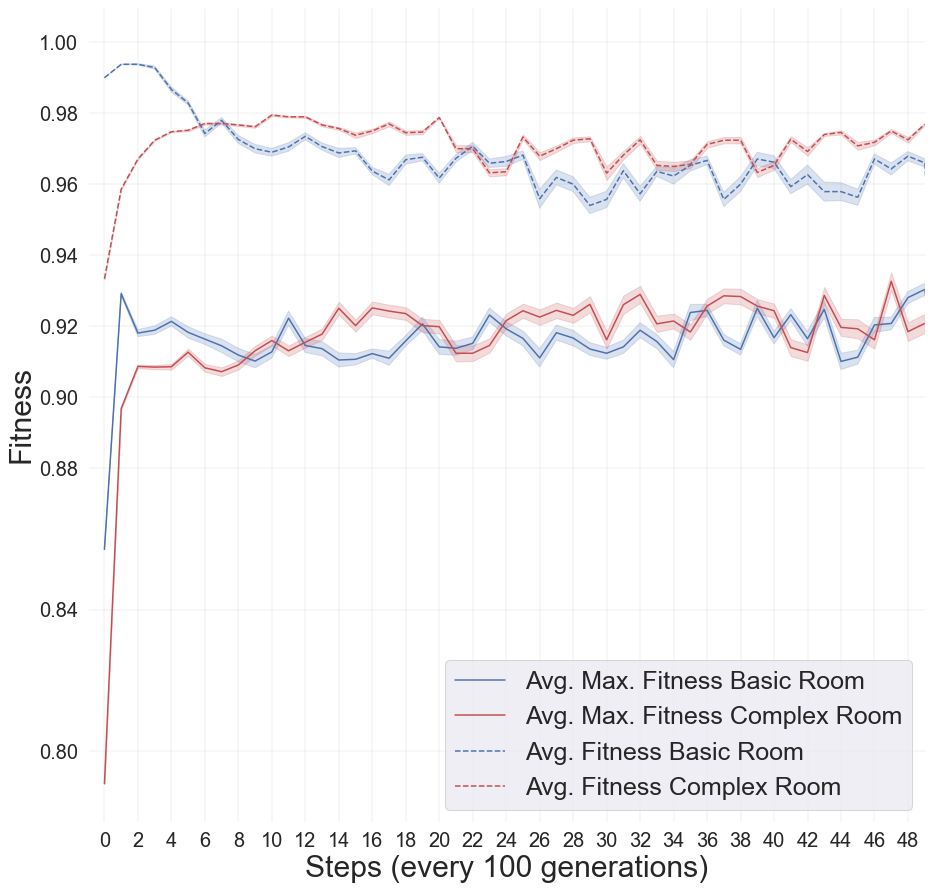

In [26]:
from matplotlib.collections import LineCollection

fitness_csv_data = 'C:/Users/alvar/projects/eclipse-workspace/eddy/my-data/Basic-room/data/finalAVGS_commma.csv'
fitness_csv_data2 = 'C:/Users/alvar/projects/eclipse-workspace/eddy/my-data/complex-room/data/finalAVGS_commma.csv'

fitness_data = pd.read_csv(fitness_csv_data, sep=',')
# fitness_data = fitness_data[fitness_data['AVG FIT'] != 0]
# fitness_data['AVG FIT'][fitness_data['AVG FIT'] == 0.0] = np.nan

#some example data
x1 = fitness_data['STEP']
y1 = fitness_data['AVG FIT']
y_1_max = fitness_data['MAX FIT']
y_1_min = fitness_data['MIN FIT']
ci1 = fitness_data['CONFIDENCE']
ci_max_1 = fitness_data['MAX_CONFIDENCE']

fitness_data2 = pd.read_csv(fitness_csv_data2, sep=',')
# fitness_data = fitness_data[fitness_data['AVG FIT'] != 0]
# fitness_data['AVG FIT'][fitness_data['AVG FIT'] == 0.0] = np.nan

#some example data
x2 = fitness_data2['STEP']
y2 = fitness_data2['AVG FIT']
y_2_max = fitness_data2['MAX FIT']
y_2_min = fitness_data2['MIN FIT']

ci2 = fitness_data2['CONFIDENCE']
ci_max_2 = fitness_data2['MAX_CONFIDENCE']

# fig,a = plt.subplots()
# a.add_collection(lc)

# '-' or 'solid' 	solid line
# '--' or 'dashed' 	dashed line
# '-.' or 'dashdot' 	dash-dotted line
# ':' or 'dotted' 	dotted line
# linestyle="dashed"

fig, ax = plt.subplots(figsize=(15,15))
ax.plot(x1,y1)
# ax.add_collection(lc1)
# ax.legend(['max'])
# ax.scatter(x1,y1, s=wLines, color='blue')


ax.plot(x2,y2, color='r')
# ax.add_collection(lc2)
# ax.scatter(x1,y1, s=wLines, color='blue')


ax.plot(x1,y_1_max,linestyle="dashed", color='b')
# ax.plot(x1,y_1_min,linestyle="dotted", color='b')

ax.plot(x2,y_2_max,linestyle="dashed", color='r')
# ax.plot(x2,y_2_min,linestyle="dotted", color='r')

ax.set(ylim=(0.78, 1.01), yticks=[0.0, 0.2, 0.4, 0.6, 0.8, 0.84, 0.88,0.9,0.92,0.94,0.96,0.98,1.0]);
ax.set(xlim=(-1, 49), xticks=np.arange(0, 50, step=2));
ax.tick_params(labelsize=20)

ax.set_xlabel('Steps (every 100 generations)', fontsize=30)
ax.set_ylabel('Fitness', fontsize=30)
ax.set_facecolor('xkcd:white')
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
# xticks(np.arange(0, 1, step=0.2))

ax.legend(['Avg. Max. Fitness Basic Room', 'Avg. Max. Fitness Complex Room', 'Avg. Fitness Basic Room','Avg. Fitness Complex Room'], loc=4, prop={'size': 25})

ax.fill_between(x1, y1 - ci1, y1 + ci1, color='b', alpha=.2)
ax.fill_between(x2, y2 - ci2, y2 + ci2, color='r', alpha=.2)

ax.fill_between(x1, y_1_max - ci_max_1, y_1_max + ci_max_1, color='b', alpha=.2)
ax.fill_between(x2, y_2_max - ci_max_2, y_2_max + ci_max_2, color='r', alpha=.2)

fig.savefig( 'C:/Users/alvar/projects/eclipse-workspace/eddy/fitnessTOG1.png')

In [318]:
lc = [n*0.05 for n in range(1, 51)]
# print(lc)

fitness_csv_data = 'C:/Users/alvar/projects/eclipse-workspace/eddy/my-data/Basic-room/data/final_commma.csv'
fitness_csv_data2 = 'C:/Users/alvar/projects/eclipse-workspace/eddy/my-data/complex-room/data/final_commma.csv'

fitness_data = pd.read_csv(fitness_csv_data, sep=',')

wLines1 = fitness_data["Count"].tolist()
print(wLines1)

som = {}
for wLine in wLines1:
    som.update({wLine:-1})

wLines1_sorted= []
    
for wLine in wLines1:
    an = 49
    aux = wLine

    for wLine_iter in wLines1:
        if wLine_iter > wLine:
            an -= 1
            
    som[wLine] = an    

for wLine in wLines1:
    wLines1_sorted.append(lc[som[wLine]])
    
print(wLines1_sorted)

##### SECOND EXPERIMENt - FOR COMPLEX!

fitness_data = pd.read_csv(fitness_csv_data2, sep=',')

wLines1 = fitness_data["Count"].tolist()
print(wLines1)

som = {}
for wLine in wLines1:
    som.update({wLine:-1})

wLines2_sorted= []
    
for wLine in wLines1:
    an = 49
    aux = wLine

    for wLine_iter in wLines1:
        if wLine_iter > wLine:
            an -= 1
            
    som[wLine] = an    

for wLine in wLines1:
    wLines2_sorted.append(lc[som[wLine]])
    
print(wLines2_sorted)


[41500, 10107, 5253, 3391, 2412, 2104, 1819, 1502, 1519, 1497, 1501, 1292, 1171, 1069, 1160, 1167, 1089, 1000, 896, 971, 1082, 963, 876, 833, 878, 876, 792, 919, 888, 900, 817, 752, 741, 832, 780, 817, 812, 776, 734, 720, 726, 769, 691, 650, 787, 867, 911, 861, 895, 732]
[2.5, 2.45, 2.4000000000000004, 2.35, 2.3000000000000003, 2.25, 2.2, 2.1, 2.15, 2.0, 2.0500000000000003, 1.9500000000000002, 1.9000000000000001, 1.6500000000000001, 1.8, 1.85, 1.75, 1.6, 1.3, 1.55, 1.7000000000000002, 1.5, 1.1, 0.9, 1.1500000000000001, 1.1, 0.65, 1.4500000000000002, 1.2000000000000002, 1.35, 0.8, 0.4, 0.35000000000000003, 0.8500000000000001, 0.55, 0.8, 0.7000000000000001, 0.5, 0.30000000000000004, 0.15000000000000002, 0.2, 0.45, 0.1, 0.05, 0.6000000000000001, 1.0, 1.4000000000000001, 0.9500000000000001, 1.25, 0.25]
[40668, 14788, 8594, 6109, 5187, 4136, 3545, 3441, 3063, 2873, 2680, 2518, 2294, 2230, 2160, 2002, 2030, 1936, 1900, 1803, 1715, 1766, 1632, 1612, 1640, 1733, 1578, 1563, 1515, 1523, 1465, 1

[4.         3.63627422 2.1132094  1.50216386 1.27544999 1.01701584
 0.87169273 0.8461198  0.75317203 0.70645225 0.65899479 0.61916003
 0.56407987 0.54834268 0.53113013 0.49227894 0.49916396 0.47604997
 0.4671978  0.44334612 0.42170749 0.43424806 0.40129832 0.39638045
 0.40326547 0.42613357 0.38802006 0.38433166 0.37252877 0.37449592
 0.36023409 0.35285728 0.378922   0.36588964 0.36613554 0.3676109
 0.38826596 0.35728337 0.34031671 0.35039835 0.36121766 0.35138192
 0.33490705 0.34793941 0.33195633 0.33367758 0.33048097 0.32261237
 0.31351431 0.30269499]
[10.          2.43542169  1.26578313  0.81710843  0.58120482  0.50698795
  0.43831325  0.36192771  0.3660241   0.36072289  0.36168675  0.3113253
  0.28216867  0.25759036  0.27951807  0.28120482  0.26240964  0.24096386
  0.21590361  0.2339759   0.26072289  0.23204819  0.21108434  0.20072289
  0.21156627  0.21108434  0.19084337  0.22144578  0.2139759   0.21686747
  0.19686747  0.18120482  0.17855422  0.20048193  0.18795181  0.19686747
  0.

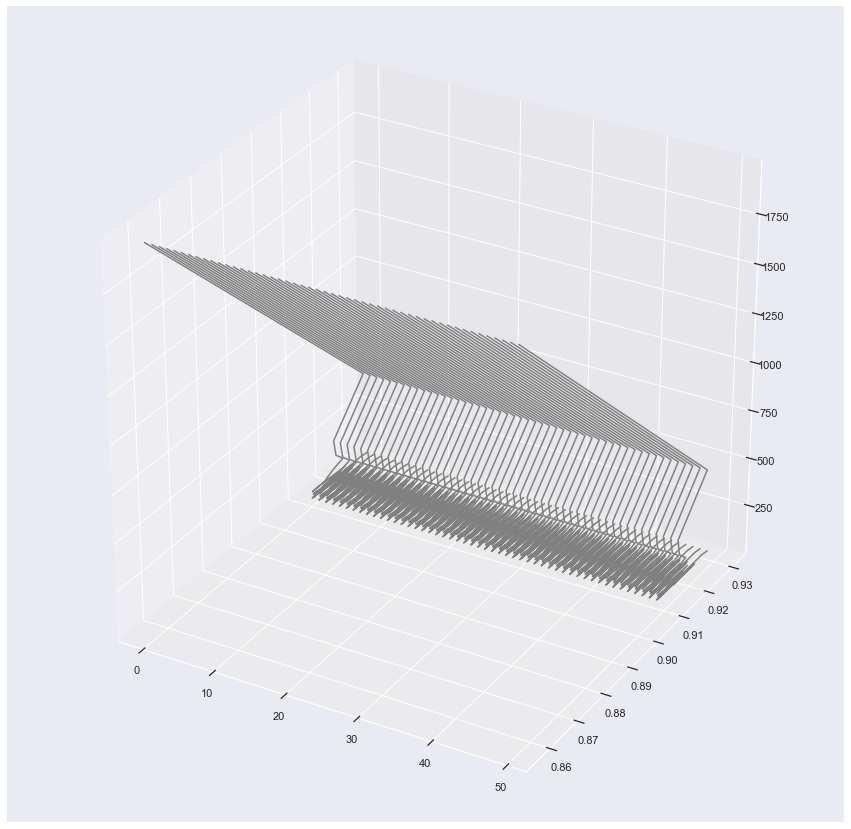

In [380]:
from matplotlib.collections import LineCollection

fitness_csv_data = 'C:/Users/alvar/projects/eclipse-workspace/eddy/my-data/Basic-room/data/Symmetry_NMesoPatterns_commma.csv'
fitness_csv_data = 'C:/Users/alvar/projects/eclipse-workspace/eddy/my-data/Basic-room/data/final_commma.csv'
fitness_csv_data2 = 'C:/Users/alvar/projects/eclipse-workspace/eddy/my-data/complex-room/data/final_commma.csv'

fitness_data = pd.read_csv(fitness_csv_data, sep=',')
# fitness_data = fitness_data[fitness_data['AVG FIT'] != 0]
# fitness_data['AVG FIT'][fitness_data['AVG FIT'] == 0.0] = np.nan

wLines1 = fitness_data["Count"].tolist()
wLines1 = np.asarray(wLines1)

print(wLines)

wLines1 = np.true_divide(wLines1, max(wLines1))
wLines1 = wLines1*10.0
print(wLines1)
wLines1[wLines1 > 4.0] = 4.0
print(wLines1)

#some example data
x1 = fitness_data['STEP']
y1 = fitness_data['AVG FIT']
y_1_max = fitness_data['MAX FIT']
y_1_min = fitness_data['MIN FIT']
z1 = fitness_data['Count']
z1 = np.true_divide(z1, 21)


fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

print(Z.shape)

X, Y = np.meshgrid(x1, y1)

# Plot the surface.
# surf = ax.plot_surface(X,Y,Z, linewidth=0, antialiased=False)

ax.plot3D(X, Y, z1, 'gray')
# ax.plot_surface(X, Y, z1, linewidth=0, antialiased=False)

plt.show()

# ax.plot(x1,y1,z1)

# fig.savefig( 'C:/Users/alvar/projects/eclipse-workspace/eddy/fitness3dTOG1.png')

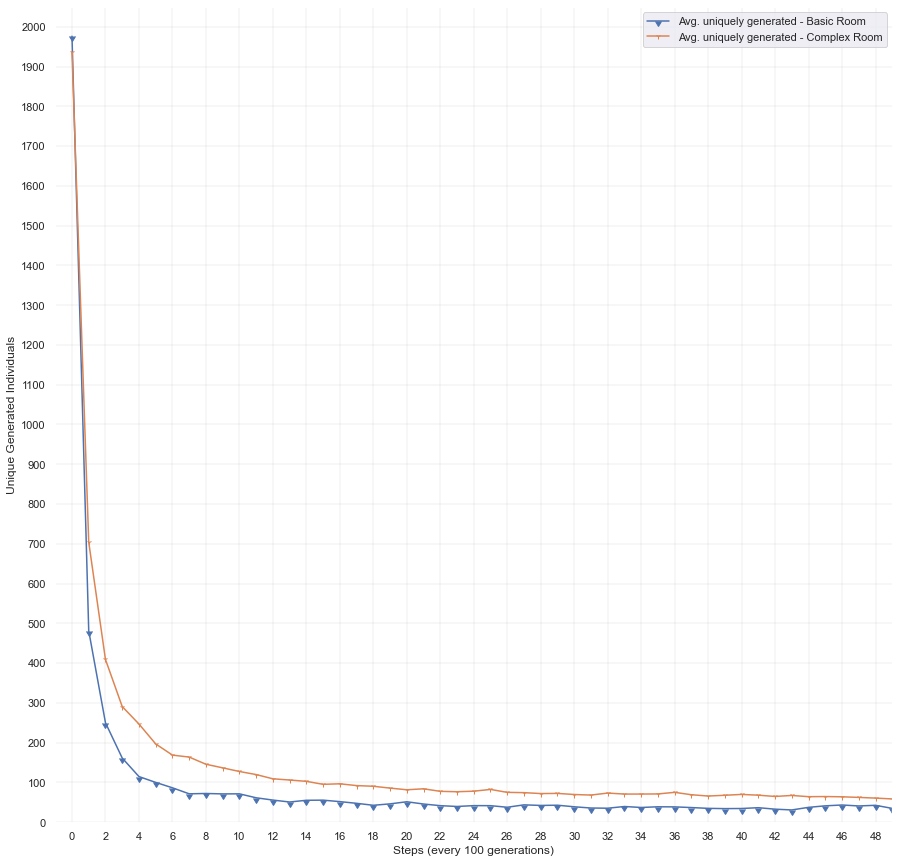

In [358]:
from matplotlib.collections import LineCollection

fitness_csv_data = 'C:/Users/alvar/projects/eclipse-workspace/eddy/my-data/Basic-room/data/Symmetry_NMesoPatterns_commma.csv'
fitness_csv_data = 'C:/Users/alvar/projects/eclipse-workspace/eddy/my-data/Basic-room/data/final_commma.csv'
fitness_csv_data2 = 'C:/Users/alvar/projects/eclipse-workspace/eddy/my-data/complex-room/data/final_commma.csv'

fitness_data = pd.read_csv(fitness_csv_data, sep=',')

x1 = fitness_data['STEP']
y1 = fitness_data['Count']
y1 = np.true_divide(y1, 21)
fitness_data2 = pd.read_csv(fitness_csv_data2, sep=',')

#some example data
x2 = fitness_data2['STEP']
y2 = fitness_data2['Count']
y2 = np.true_divide(y2, 21)

# '-' or 'solid' 	solid line
# '--' or 'dashed' 	dashed line
# '-.' or 'dashdot' 	dash-dotted line
# ':' or 'dotted' 	dotted line
# linestyle="dashed"

fig, ax = plt.subplots(figsize=(15,15))
ax.plot(x1,y1, marker=11)
ax.plot(x2,y2, marker="1")

ax.set(ylim=(0, 2050), yticks=np.arange(0, 2050, step=100));
ax.set(xlim=(-1, 49), xticks=np.arange(0, 50, step=2)); 

ax.set_xlabel('Steps (every 100 generations)')
ax.set_ylabel('Unique Generated Individuals')
ax.set_facecolor('xkcd:white')
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
# xticks(np.arange(0, 1, step=0.2))

ax.legend(['Avg. uniquely generated - Basic Room', 'Avg. uniquely generated - Complex Room'], loc=0)

# ax.fill_between(x1, y1 - ci1, y1 + ci1, color='b', alpha=.2)
# ax.fill_between(x2, y2 - ci2, y2 + ci2, color='r', alpha=.2)

fig.savefig( 'C:/Users/alvar/projects/eclipse-workspace/eddy/countTOG1.png')

[4.         3.63627422 2.1132094  1.50216386 1.27544999 1.01701584
 0.87169273 0.8461198  0.75317203 0.70645225 0.65899479 0.61916003
 0.56407987 0.54834268 0.53113013 0.49227894 0.49916396 0.47604997
 0.4671978  0.44334612 0.42170749 0.43424806 0.40129832 0.39638045
 0.40326547 0.42613357 0.38802006 0.38433166 0.37252877 0.37449592
 0.36023409 0.35285728 0.378922   0.36588964 0.36613554 0.3676109
 0.38826596 0.35728337 0.34031671 0.35039835 0.36121766 0.35138192
 0.33490705 0.34793941 0.33195633 0.33367758 0.33048097 0.32261237
 0.31351431 0.30269499]
[10.          2.43542169  1.26578313  0.81710843  0.58120482  0.50698795
  0.43831325  0.36192771  0.3660241   0.36072289  0.36168675  0.3113253
  0.28216867  0.25759036  0.27951807  0.28120482  0.26240964  0.24096386
  0.21590361  0.2339759   0.26072289  0.23204819  0.21108434  0.20072289
  0.21156627  0.21108434  0.19084337  0.22144578  0.2139759   0.21686747
  0.19686747  0.18120482  0.17855422  0.20048193  0.18795181  0.19686747
  0.

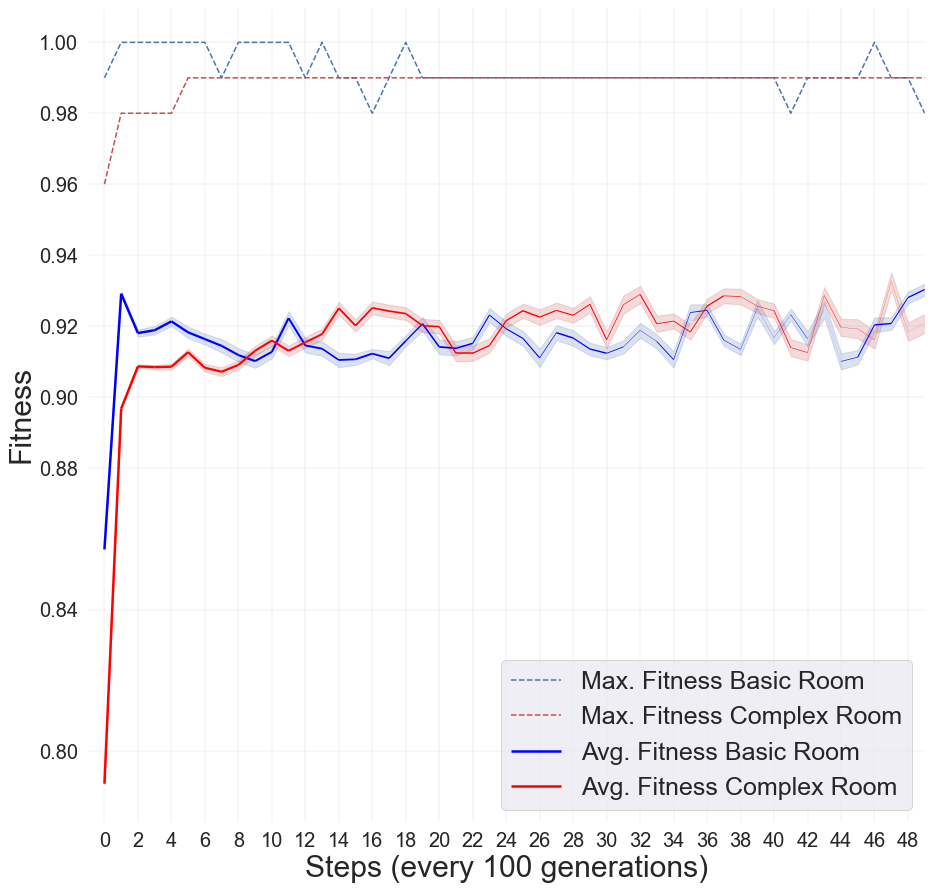

In [392]:
from matplotlib.collections import LineCollection

fitness_csv_data = 'C:/Users/alvar/projects/eclipse-workspace/eddy/my-data/Basic-room/data/Symmetry_NMesoPatterns_commma.csv'
fitness_csv_data = 'C:/Users/alvar/projects/eclipse-workspace/eddy/my-data/Basic-room/data/final_commma.csv'
fitness_csv_data2 = 'C:/Users/alvar/projects/eclipse-workspace/eddy/my-data/complex-room/data/final_commma.csv'

fitness_data = pd.read_csv(fitness_csv_data, sep=',')
# fitness_data = fitness_data[fitness_data['AVG FIT'] != 0]
# fitness_data['AVG FIT'][fitness_data['AVG FIT'] == 0.0] = np.nan

wLines1 = fitness_data["Count"].tolist()
wLines1 = np.asarray(wLines1)

print(wLines)

wLines1 = np.true_divide(wLines1, max(wLines1))
wLines1 = wLines1*10.0
print(wLines1)
wLines1[wLines1 > 4.0] = 4.0
print(wLines1)

#some example data
x1 = fitness_data['STEP']
y1 = fitness_data['AVG FIT']
y_1_max = fitness_data['MAX FIT']
y_1_min = fitness_data['MIN FIT']


ci1 = fitness_data['CONFIDENCE']

points = np.array([x1, y1]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
lc1 = LineCollection(segments, linewidths=wLines1_sorted,color='blue')

fitness_data2 = pd.read_csv(fitness_csv_data2, sep=',')
# fitness_data = fitness_data[fitness_data['AVG FIT'] != 0]
# fitness_data['AVG FIT'][fitness_data['AVG FIT'] == 0.0] = np.nan

wLines2 = fitness_data2["Count"].tolist()
wLines2 = np.asarray(wLines2)

print(wLines2)

wLines2 = np.true_divide(wLines2, max(wLines2))
wLines2 = wLines2*10.0
print(wLines2)
wLines2[wLines2 > 4.0] = 4.0
print(wLines2)

#some example data
x2 = fitness_data2['STEP']
y2 = fitness_data2['AVG FIT']
y_2_max = fitness_data2['MAX FIT']
y_2_min = fitness_data2['MIN FIT']

ci2 = fitness_data2['CONFIDENCE']

points = np.array([x2, y2]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
lc2 = LineCollection(segments, linewidths=wLines2_sorted,color='red')

# fig,a = plt.subplots()
# a.add_collection(lc)

# '-' or 'solid' 	solid line
# '--' or 'dashed' 	dashed line
# '-.' or 'dashdot' 	dash-dotted line
# ':' or 'dotted' 	dotted line
# linestyle="dashed"

fig, ax = plt.subplots(figsize=(15,15))
# ax.plot(x1,y1)
ax.add_collection(lc1)
ax.legend(['max'])
# ax.scatter(x1,y1, s=wLines, color='blue')


ax.add_collection(lc2)
ax.legend(['min'])
# ax.scatter(x1,y1, s=wLines, color='blue')


ax.plot(x1,y_1_max,linestyle="dashed", color='b')
# ax.plot(x1,y_1_min,linestyle="dotted", color='b')

ax.plot(x2,y_2_max,linestyle="dashed", color='r')
# ax.plot(x2,y_2_min,linestyle="dotted", color='r')

ax.set(ylim=(0.78, 1.01), yticks=[0.0, 0.2, 0.4, 0.6, 0.8, 0.84, 0.88,0.9,0.92,0.94,0.96,0.98,1.0]);
ax.set(xlim=(-1, 49), xticks=np.arange(0, 50, step=2));
ax.tick_params(labelsize=20)

ax.set_xlabel('Steps (every 100 generations)', fontsize=30)
ax.set_ylabel('Fitness', fontsize=30)
ax.set_facecolor('xkcd:white')
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
# xticks(np.arange(0, 1, step=0.2))

ax.legend(['Max. Fitness Basic Room', 'Max. Fitness Complex Room', 'Avg. Fitness Basic Room','Avg. Fitness Complex Room'], loc=4, prop={'size': 25})

ax.fill_between(x1, y1 - ci1, y1 + ci1, color='b', alpha=.2)
ax.fill_between(x2, y2 - ci2, y2 + ci2, color='r', alpha=.2)

fig.savefig( 'C:/Users/alvar/projects/eclipse-workspace/eddy/fitnessTOG1.png')

[40668 14788  8594  6109  5187  4136  3545  3441  3063  2873  2680  2518
  2294  2230  2160  2002  2030  1936  1900  1803  1715  1766  1632  1612
  1640  1733  1578  1563  1515  1523  1465  1435  1541  1488  1489  1495
  1579  1453  1384  1425  1469  1429  1362  1415  1350  1357  1344  1312
  1275  1231]
[10.          3.63627422  2.1132094   1.50216386  1.27544999  1.01701584
  0.87169273  0.8461198   0.75317203  0.70645225  0.65899479  0.61916003
  0.56407987  0.54834268  0.53113013  0.49227894  0.49916396  0.47604997
  0.4671978   0.44334612  0.42170749  0.43424806  0.40129832  0.39638045
  0.40326547  0.42613357  0.38802006  0.38433166  0.37252877  0.37449592
  0.36023409  0.35285728  0.378922    0.36588964  0.36613554  0.3676109
  0.38826596  0.35728337  0.34031671  0.35039835  0.36121766  0.35138192
  0.33490705  0.34793941  0.33195633  0.33367758  0.33048097  0.32261237
  0.31351431  0.30269499]
[4.         3.63627422 2.1132094  1.50216386 1.27544999 1.01701584
 0.87169273 0.8461

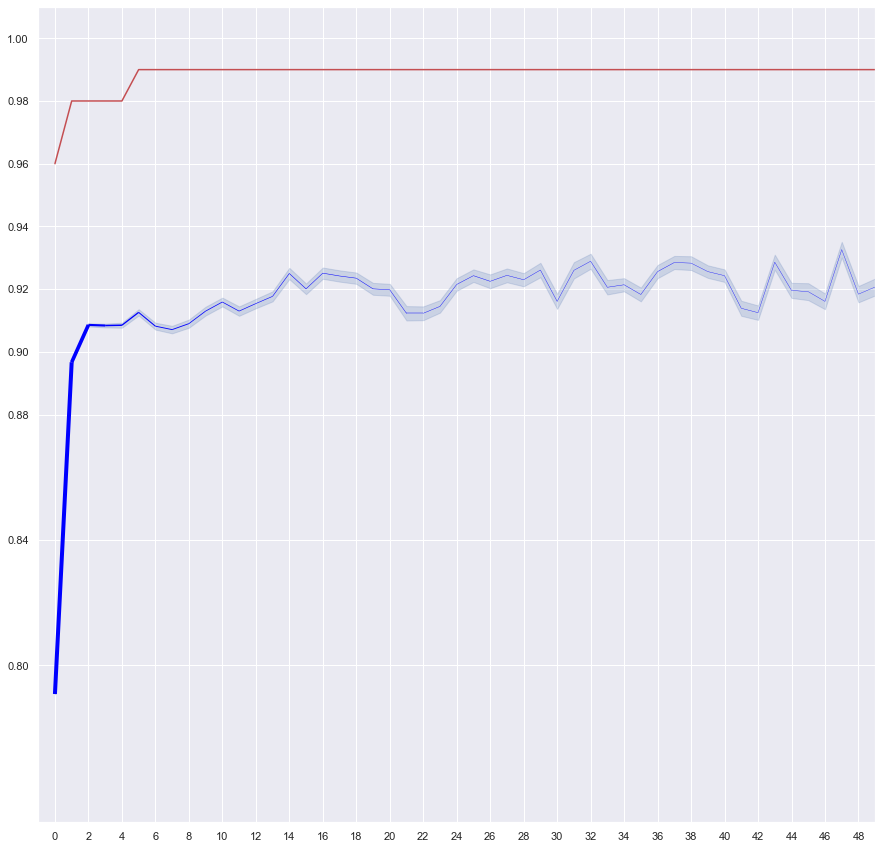

In [229]:
from matplotlib.collections import LineCollection

fitness_csv_data = 'C:/Users/alvar/projects/eclipse-workspace/eddy/my-data/Basic-room/data/Symmetry_NMesoPatterns_commma.csv'
fitness_csv_data = 'C:/Users/alvar/projects/eclipse-workspace/eddy/my-data/Basic-room/data/final_commma.csv'
fitness_csv_data = 'C:/Users/alvar/projects/eclipse-workspace/eddy/my-data/complex-room/data/final_commma.csv'

fitness_data = pd.read_csv(fitness_csv_data, sep=',')
# fitness_data = fitness_data[fitness_data['AVG FIT'] != 0]
# fitness_data['AVG FIT'][fitness_data['AVG FIT'] == 0.0] = np.nan

wLines = fitness_data["Count"].tolist()
wLines = np.asarray(wLines)

print(wLines)

wLines = np.true_divide(wLines, max(wLines))
wLines = wLines*10.0
print(wLines)
wLines[wLines > 4.0] = .0
print(wLines)

#some example data
x1 = fitness_data['STEP']
y1 = fitness_data['AVG FIT']
y_1_max = fitness_data['MAX FIT']

ci1 = fitness_data['CONFIDENCE']

points = np.array([x1, y1]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
lc = LineCollection(segments, linewidths=wLines,color='blue')
# fig,a = plt.subplots()
# a.add_collection(lc)

# '-' or 'solid' 	solid line
# '--' or 'dashed' 	dashed line
# '-.' or 'dashdot' 	dash-dotted line
# ':' or 'dotted' 	dotted line
# linestyle="dashed"

fig, ax = plt.subplots(figsize=(15,15))
# ax.plot(x1,y1)
ax.add_collection(lc)
# ax.scatter(x1,y1, s=wLines, color='blue')
ax.fill_between(x1, y1 - ci1, y1 + ci1, color='b', alpha=.2)
ax.plot(x1,y_1_max, color='r')
ax.set(ylim=(0.75, 1.01), yticks=[0.0, 0.2, 0.4, 0.6, 0.8, 0.84, 0.88,0.9,0.92,0.94,0.96,0.98,1.0]);
ax.set(xlim=(-1, 49), xticks=np.arange(0, 50, step=2)); 

# xticks(np.arange(0, 1, step=0.2))

In [ ]:
partDims_tosave = experimentData()

controlera = [25, 34, 16, 31, 19, 27, 33, 30]
controlera_ind = -1

for csvDirectory in csvDirectories:
    controlera_ind = controlera_ind + 1
    csvFiles = getCSVFiles(csvDirectory)
    savePlotsDirectory = csvDirectory
    design_goal = csvDirectory.split("/")
    
    
    
    #print(csvFiles)

    ##DONE! Now i must have this like "static"
    
    for file in csvFiles:
            
        dirName = file.split(".")[0]
        if dirName != 'experimentRoom':
            continue
        
        print(dirName)
        experiment_room = pd.read_csv(csvDirectory + file, sep=';')
        experiment_room = experiment_room[pd.notnull(experiment_room['Leniency'])]
        experiment_room = experiment_room.round(2)
        experiment_room = experiment_room.drop(columns=['Score']) if 'Score' in experiment_room.columns else experiment_room
        experiment_room = experiment_room.drop(columns=['filename']) if 'filename' in experiment_room.columns else experiment_room
        experiment_room['Leniency'][experiment_room['Leniency'] >= 1.0] = 1.0
        break
        
    print('__' + csvDirectory)
    
    combo = [['Leniency', 'Linearity'],
            ['Leniency','NMesoPatterns'],
            ['Leniency','NSpatialPatterns'],
            ['Linearity','NMesoPatterns'],
            ['Linearity','NSpatialPatterns'],
            ['NMesoPatterns','NSpatialPatterns'],
            ['Symmetry','Leniency'],
            ['Symmetry','Linearity'],
            ['Symmetry','NMesoPatterns'],
            ['Symmetry','NSpatialPatterns'],
            ['Inner Similarity','Leniency'],
            ['Inner Similarity','Linearity'],
            ['Inner Similarity','NMesoPatterns'],
            ['Inner Similarity','NSpatialPatterns'],
            ['Similarity','Inner Similarity'],
            ['Similarity','Leniency'],
            ['Similarity','Linearity'],
            ['Similarity','NMesoPatterns'],
            ['Similarity','NSpatialPatterns'],
            ['Symmetry','Inner Similarity'],
            ['Symmetry','Similarity']]
    
    for c in combo:
        for file in csvFiles:
            
            dirName = file.split(".")[0]
            if dirName == 'experimentRoom' or dirName.split("-")[0] != 'custom':
                continue
                
            num_data = pd.read_csv(csvDirectory + file, sep=';')
            num_data = num_data[pd.notnull(num_data['Leniency'])]
            num_data = num_data.round(2)
            num_data = num_data.drop(columns=['Score'])
            num_data['Leniency'][num_data['Leniency'] >= 1.0] = 1.0

            num_data = num_data.append(experiment_room, ignore_index=True)

            ##DIMENSIONS USED!!
            x_var = getDimensionName(num_data['DIM X'][0])
            y_var = getDimensionName(num_data['DIM Y'][0])
#             print(x_var + " = " + c[0])
#             print(y_var + " = " + c[1])
            
            if(c[0] != x_var or c[1] != y_var):
                continue

            #read the csv, remove every row that have a missing value (i.e. NaN) and round the floats

            
            print(x_var + "_" + y_var)
            filename_dims = dirName.split("-")
            
            nsteps = num_data['STEP'].values.max() + 1
            ncols = 5.0
            nrows = int(math.ceil(nsteps / ncols))
            ncols = int(ncols)

            fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*4, nrows*4), sharey=True, sharex=True)

            final_sum = 0.0
            fit_size = 0
            final_steps = 0
            covered_bins = 0
            init_covered_bins = 0
            finished = False
            prev_bin = 0.0
            AAGR = 0.0

            for y in range(0, nrows):
                for x in range(0, ncols):
                    

    #                 tosave.addDataPoint(cur_usr, td[room_id],listToString(Z_hat),listToString(key_clust), listToString(threshold_key_clust))
                    a = num_data[num_data['STEP'] == x + y*ncols]
                    if(a.shape[0] == 0 or (x + y*ncols) >= controlera[controlera_ind]):
    #                             print("FOUND MY SOLUTION ")
                        finished = True
                        break
            
                    

                    if(finished == True):
                        break
                      
                    covered_bins = hexbinCreatorCounter(axs[y,x],  x_var, y_var, color="gray", data=num_data[num_data.STEP <= x + y*ncols], min_series=num_data.min(), max_series=num_data.max())
                    if(y == 0 and x == 0):
    #                             print(covered_bins)
                        init_covered_bins = covered_bins

                    su = a['Fitness'].sum()
                    final_sum = final_sum + su
                    fit_size = fit_size + a.shape[0]
                    final_steps = x + y*ncols
                    
                    if(y != 0 or x != 0):
                        AAGR = AAGR + ((covered_bins/prev_bin) - 1.0)
#                         print(covered_bins)
#                         print(prev_bin)
#                         print(init_covered_bins)
#                         print(((covered_bins/prev_bin) - 1.0))
#                         print()
                     
                    
                    prev_bin = covered_bins
#                     print("INIT: ")
#                     print(prev_bin)
#                     print()

                if(finished == True):
                    break

#             partDims_tosave.addDataPoint(design_goal[len(design_goal) - 2], x_var, y_var,  x_var, y_var, covered_bins, final_sum, fit_size, 
#                                            covered_bins/368, covered_bins/122.0, final_steps, (((covered_bins-init_covered_bins)/init_covered_bins)/final_steps)*100.0)

#             partDims_tosave.addDataPoint(design_goal[len(design_goal) - 2], x_var, y_var,  x_var, y_var, covered_bins, final_sum, fit_size, 
#                                            covered_bins/122.0 if (x_var == "NMesoPatterns" or y_var == "NMesoPatterns") else covered_bins/368, covered_bins/122.0, final_steps, (((covered_bins/init_covered_bins)**(1.0/final_steps))-1.0)*100.0)
    
            partDims_tosave.addDataPoint(design_goal[len(design_goal) - 2], x_var, y_var,  x_var, y_var, covered_bins, final_sum, fit_size, 
                                           covered_bins/122.0 if (x_var == "NMesoPatterns" or y_var == "NMesoPatterns") else covered_bins/368, covered_bins/122.0, final_steps, (AAGR/final_steps)*100.0)
#             plt.show()
            plt.close()
            
df = pd.DataFrame(partDims_tosave.getData(), columns = partDims_tosave.getData().keys())
df.to_csv(csvDirectory + '../newgrow2_non-commma.csv', index=False, sep=';',  float_format='%.3f', mode='w')
df.to_csv(csvDirectory + '../newgrow2_commma.csv', index=False, sep=',',  float_format='%.3f', mode='w')
            
 

In [ ]:
partDims_tosave = experimentData()

for csvDirectory in csvDirectories:
    csvFiles = getCSVFiles(csvDirectory)
    savePlotsDirectory = csvDirectory
    design_goal = csvDirectory.split("/")
    
    
    
    #print(csvFiles)

    ##DONE! Now i must have this like "static"
    
    for file in csvFiles:
            
        dirName = file.split(".")[0]
        if dirName != 'experimentRoom':
            continue
        
        print(dirName)
        experiment_room = pd.read_csv(csvDirectory + file, sep=';')
        experiment_room = experiment_room[pd.notnull(experiment_room['Leniency'])]
        experiment_room = experiment_room.round(2)
        experiment_room = experiment_room.drop(columns=['Score']) if 'Score' in experiment_room.columns else experiment_room
        experiment_room = experiment_room.drop(columns=['filename']) if 'filename' in experiment_room.columns else experiment_room
        experiment_room['Leniency'][experiment_room['Leniency'] >= 1.0] = 1.0
        break
        
    print('__' + csvDirectory)
    
    combo = [['Leniency', 'Linearity'],
            ['Leniency','NMesoPatterns'],
            ['Leniency','NSpatialPatterns'],
            ['Linearity','NMesoPatterns'],
            ['Linearity','NSpatialPatterns'],
            ['NMesoPatterns','NSpatialPatterns'],
            ['Symmetry','Leniency'],
            ['Symmetry','Linearity'],
            ['Symmetry','NMesoPatterns'],
            ['Symmetry','NSpatialPatterns'],
            ['Inner Similarity','Leniency'],
            ['Inner Similarity','Linearity'],
            ['Inner Similarity','NMesoPatterns'],
            ['Inner Similarity','NSpatialPatterns'],
            ['Similarity','Inner Similarity'],
            ['Similarity','Leniency'],
            ['Similarity','Linearity'],
            ['Similarity','NMesoPatterns'],
            ['Similarity','NSpatialPatterns'],
            ['Symmetry','Inner Similarity'],
            ['Symmetry','Similarity']]
    
    for c in combo:
        for file in csvFiles:
            
            dirName = file.split(".")[0]
            if dirName == 'experimentRoom' or dirName.split("-")[0] != 'custom':
                continue
                
            num_data = pd.read_csv(csvDirectory + file, sep=';')
            num_data = num_data[pd.notnull(num_data['Leniency'])]
            num_data = num_data.round(2)
            num_data = num_data.drop(columns=['Score'])
            num_data['Leniency'][num_data['Leniency'] >= 1.0] = 1.0

            num_data = num_data.append(experiment_room, ignore_index=True)

            ##DIMENSIONS USED!!
            x_var = getDimensionName(num_data['DIM X'][0])
            y_var = getDimensionName(num_data['DIM Y'][0])
#             print(x_var + " = " + c[0])
#             print(y_var + " = " + c[1])
            
            if(c[0] != x_var or c[1] != y_var):
                continue

            #read the csv, remove every row that have a missing value (i.e. NaN) and round the floats

            
            print(x_var + "_" + y_var)
            filename_dims = dirName.split("-")
            
            nsteps = num_data['STEP'].values.max() + 1
            ncols = 5.0
            nrows = int(math.ceil(nsteps / ncols))
            ncols = int(ncols)

            fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*4, nrows*4), sharey=True, sharex=True)

            final_sum = 0.0
            fit_size = 0
            final_steps = 0
            covered_bins = 0
            init_covered_bins = 0
            finished = False

            for y in range(0, nrows):
                for x in range(0, ncols):
                    

    #                 tosave.addDataPoint(cur_usr, td[room_id],listToString(Z_hat),listToString(key_clust), listToString(threshold_key_clust))
                    a = num_data[num_data['STEP'] == x + y*ncols]
                    

                    if(a.shape[0] == 0):
    #                             print("FOUND MY SOLUTION ")
                        finished = True
                        break
            
                    

                    if(finished == True):
                        break
                      
                    covered_bins = hexbinCreatorCounter(axs[y,x],  x_var, y_var, color="gray", data=num_data[num_data.STEP <= x + y*ncols], min_series=num_data.min(), max_series=num_data.max())
                    if(y == 0 and x == 0):
    #                             print(covered_bins)
                        init_covered_bins = covered_bins

                    su = a['Fitness'].sum()
                    final_sum = final_sum + su
                    fit_size = fit_size + a.shape[0]
                    final_steps = x + y*ncols

                if(finished == True):
                    break

#             partDims_tosave.addDataPoint(design_goal[len(design_goal) - 2], x_var, y_var,  x_var, y_var, covered_bins, final_sum, fit_size, 
#                                            covered_bins/368, covered_bins/122.0, final_steps, (((covered_bins-init_covered_bins)/init_covered_bins)/final_steps)*100.0)

            partDims_tosave.addDataPoint(design_goal[len(design_goal) - 2], x_var, y_var,  x_var, y_var, covered_bins, final_sum, fit_size, 
                                           covered_bins/122.0 if (x_var == "NMesoPatterns" or y_var == "NMesoPatterns") else covered_bins/368, covered_bins/122.0, final_steps, (((covered_bins/init_covered_bins)**(1.0/final_steps))-1.0)*100.0)
#             plt.show()
            plt.close()
            
df = pd.DataFrame(partDims_tosave.getData(), columns = partDims_tosave.getData().keys())
df.to_csv(csvDirectory + '../test2_non-commma.csv', index=False, sep=';',  float_format='%.3f', mode='w')
df.to_csv(csvDirectory + '../test2_commma.csv', index=False, sep=',',  float_format='%.3f', mode='w')
            
 

In [ ]:
for csvDirectory in csvDirectories:
    csvFiles = getCSVFiles(csvDirectory)
    savePlotsDirectory = csvDirectory
    design_goal = csvDirectory.split("/")

    individual_tosave = experimentData()
    partDims_tosave = experimentData()
    
    
    #print(csvFiles)

    ##DONE! Now i must have this like "static"
    experiment_room = pd.read_csv(csvDirectory + csvFiles[len(csvFiles) - 1], sep=';')
    experiment_room = experiment_room[pd.notnull(experiment_room['Leniency'])]
    experiment_room = experiment_room.round(2)
    experiment_room = experiment_room.drop(columns=['Score']) if 'Score' in experiment_room.columns else experiment_room
    experiment_room = experiment_room.drop(columns=['filename']) if 'filename' in experiment_room.columns else experiment_room
    experiment_room['Leniency'][experiment_room['Leniency'] >= 1.0] = 1.0
    print('__' + csvDirectory)
    
    for file in csvFiles:
        experiment_tosave = experimentData()
    #     sns.set()
    #     sns.set_style("whitegrid", {'axes.grid' : False})
        sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'axes.grid' : False})
        #plt.rcParams['text.color'] = "white"
        #plt.rcParams['axes.labelcolor'] = "white"
        #plt.rcParams['xtick.color'] = "white"
        #plt.rcParams['ytick.color'] = "white"

        dirName = file.split(".")[0]
        if dirName == 'experimentRoom':
            continue

        #read the csv, remove every row that have a missing value (i.e. NaN) and round the floats
        num_data = pd.read_csv(csvDirectory + file, sep=';')
        num_data = num_data[pd.notnull(num_data['Leniency'])]
        num_data = num_data.round(2)
        num_data = num_data.drop(columns=['Score'])
        num_data['Leniency'][num_data['Leniency'] >= 1.0] = 1.0

        num_data = num_data.append(experiment_room, ignore_index=True)

        ##DIMENSIONS USED!!
        x_var = getDimensionName(num_data['DIM X'][0])
        y_var = getDimensionName(num_data['DIM Y'][0])
        
        print(x_var + "_" + y_var)
        
        # Create an array with the colors you want to use
        colors = ['orange']# Set your custom color palette

        testVars = ["Leniency",
                    "Fitness",
                    "Linearity",
                    "Similarity",
                    "NMesoPatterns",
                    "NSpatialPatterns",
                    "Symmetry",
                    "Inner Similarity"
                   ]
        filename_dims = dirName.split("-")
        
        #Create pairs 
#         for i in range(0,8):
#             for j in range(i,8):

#                 if i == j:
#                     continue
                    
#                 nsteps = num_data['STEP'].values.max() + 1
#                 ncols = 5.0
#                 nrows = int(math.ceil(nsteps / ncols))
#                 ncols = int(ncols)

#                 fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*4, nrows*4), sharey=True, sharex=True)
                
#                 final_sum = 0.0
#                 fit_size = 0
#                 final_steps = 0
#                 covered_bins = 0
#                 init_covered_bins = 0
#                 finished = False
                
#                 for y in range(0, nrows):
#                     for x in range(0, ncols):
#                         covered_bins = hexbinCreatorCounter(axs[y,x],  testVars[i], testVars[j], color="gray", data=num_data[num_data.STEP <= x + y*ncols], min_series=num_data.min(), max_series=num_data.max())

#         #                 tosave.addDataPoint(cur_usr, td[room_id],listToString(Z_hat),listToString(key_clust), listToString(threshold_key_clust))
#                         a = num_data[num_data['STEP'] == x + y*ncols]
#                         if(y == 0 and x == 0):
# #                             print(covered_bins)
#                             init_covered_bins = covered_bins
            
#                         if(a.shape[0] == 0):
# #                             print("FOUND MY SOLUTION ")
#                             finished = True
#                             break

#                         if(finished == True):
#                             break
                                    
#                         su = a['Fitness'].sum()
#                         final_sum = final_sum + su
#                         fit_size = fit_size + a.shape[0]
#                         final_steps = x + y*ncols
                        
#                         experiment_tosave.addDataPoint(design_goal[len(design_goal) - 2], x_var, y_var, testVars[i], testVars[j], covered_bins, su/a.shape[0], a.shape[0], covered_bins/368, covered_bins/122.0, x + y*ncols, 0)
# #                         tosave.addDataPoint(design_goal[len(design_goal) - 2], x_var, y_var, "ra", "ra", covered_bins, su/a.shape[0], a.shape[0], x + y*ncols)
#                     if(finished == True):
#                         break
            
#                 individual_tosave.addDataPoint(design_goal[len(design_goal) - 2], x_var, y_var, testVars[i], testVars[j], covered_bins, final_sum, fit_size, 
#                                                covered_bins/368, covered_bins/122.0, final_steps, (((covered_bins-init_covered_bins)/init_covered_bins)/final_steps)*100.0)
#                 plt.close()
                
        nsteps = num_data['STEP'].values.max() + 1
        ncols = 5.0
        nrows = int(math.ceil(nsteps / ncols))
        ncols = int(ncols)

        fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*4, nrows*4), sharey=True, sharex=True)

        final_sum = 0.0
        fit_size = 0
        final_steps = 0
        covered_bins = 0
        init_covered_bins = 0
        finished = False

        for y in range(0, nrows):
            for x in range(0, ncols):
                covered_bins = hexbinCreatorCounter(axs[y,x],  x_var, y_var, color="gray", data=num_data[num_data.STEP <= x + y*ncols], min_series=num_data.min(), max_series=num_data.max())

#                 tosave.addDataPoint(cur_usr, td[room_id],listToString(Z_hat),listToString(key_clust), listToString(threshold_key_clust))
                a = num_data[num_data['STEP'] == x + y*ncols]
                if(y == 0 and x == 0):
#                             print(covered_bins)
                    init_covered_bins = covered_bins

                if(a.shape[0] == 0):
#                             print("FOUND MY SOLUTION ")
                    finished = True
                    break

                if(finished == True):
                    break

                su = a['Fitness'].sum()
                final_sum = final_sum + su
                fit_size = fit_size + a.shape[0]
                final_steps = x + y*ncols

            if(finished == True):
                break

        partDims_tosave.addDataPoint(design_goal[len(design_goal) - 2], x_var, y_var,  x_var, y_var, covered_bins, final_sum, fit_size, 
                                       covered_bins/368, covered_bins/122.0, final_steps, (((covered_bins-init_covered_bins)/init_covered_bins)/final_steps)*100.0)
        plt.close()
                
#         df = pd.DataFrame(experiment_tosave.getData(), columns = experiment_tosave.getData().keys())
#         df.to_csv(csvDirectory + '/' + x_var + "_" + y_var + '_non-commma.csv', index=False, sep=';',  float_format='%.3f', mode='a')
#         df.to_csv(csvDirectory + '/' + x_var + "_" + y_var + '_commma.csv', index=False, sep=',',  float_format='%.3f', mode='a')
#         break
        
#     df = pd.DataFrame(individual_tosave.getData(), columns = individual_tosave.getData().keys())
#     df.to_csv(csvDirectory + '/ind_non-commma.csv', index=False, sep=';',  float_format='%.3f', mode='a')
#     df.to_csv(csvDirectory + '/ind_commma.csv', index=False, sep=',',  float_format='%.3f', mode='a')
    
    df = pd.DataFrame(partDims_tosave.getData(), columns = partDims_tosave.getData().keys())
    df.to_csv(csvDirectory + '/partdims_non-commma.csv', index=False, sep=';',  float_format='%.3f', mode='a')
    df.to_csv(csvDirectory + '/partdims_commma.csv', index=False, sep=',',  float_format='%.3f', mode='a')


## THIS IS TO CREATE A SIMPLER EXPERIMENT - WHERE WE ONLY PLOT THE INTERESTED DIMENSIONS

In [71]:
for csvDirectory in csvDirectories:
    csvFiles = getCSVFiles(csvDirectory)
    savePlotsDirectory = csvDirectory
    #print(csvFiles)

    ##DONE! Now i must have this like "static"
    for file in csvFiles:
            
        dirName = file.split(".")[0]
        if dirName != 'experimentRoom':
            continue
        
        print(dirName)
        experiment_room = pd.read_csv(csvDirectory + file, sep=';')
        experiment_room = experiment_room[pd.notnull(experiment_room['Leniency'])]
        experiment_room = experiment_room.round(2)
        experiment_room = experiment_room.drop(columns=['Score']) if 'Score' in experiment_room.columns else experiment_room
        experiment_room = experiment_room.drop(columns=['filename']) if 'filename' in experiment_room.columns else experiment_room
        experiment_room['Leniency'][experiment_room['Leniency'] >= 1.0] = 1.0
        break
        
    print('__' + csvDirectory)
    
    combo = [#['Leniency', 'Linearity'],
#             ['Leniency','NMesoPatterns'],
#             ['Leniency','NSpatialPatterns'],
#             ['Linearity','NMesoPatterns'],
#             ['Linearity','NSpatialPatterns'],
#             ['NMesoPatterns','NSpatialPatterns'],
#             ['Symmetry','Leniency'],
            ['Symmetry','Linearity']]
#             ['Symmetry','NMesoPatterns'],
#             ['Symmetry','NSpatialPatterns'],
#             ['Inner Similarity','Leniency'],
#             ['Inner Similarity','Linearity'],
#             ['Inner Similarity','NMesoPatterns'],
#             ['Inner Similarity','NSpatialPatterns'],
#             ['Similarity','Inner Similarity'],
#             ['Similarity','Leniency'],
#             ['Similarity','Linearity'],
#             ['Similarity','NMesoPatterns'],
#             ['Similarity','NSpatialPatterns'],
#             ['Symmetry','Inner Similarity'],
#             ['Symmetry','Similarity']]
    
    for c in combo:
        
    
        for file in csvFiles:
        #     sns.set()
        #     sns.set_style("whitegrid", {'axes.grid' : False})
            sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'axes.grid' : False})
            #plt.rcParams['text.color'] = "white"
            #plt.rcParams['axes.labelcolor'] = "white"
            #plt.rcParams['xtick.color'] = "white"
            #plt.rcParams['ytick.color'] = "white"
            
            dirName = file.split(".")[0]
            if dirName == 'experimentRoom' or dirName.split("-")[0] != 'custom':
                continue
                
            num_data = pd.read_csv(csvDirectory + file, sep=';')
            num_data = num_data[pd.notnull(num_data['Leniency'])]
            num_data = num_data.round(2)
            num_data = num_data.drop(columns=['Score'])
            num_data['Leniency'][num_data['Leniency'] >= 1.0] = 1.0

            num_data = num_data.append(experiment_room, ignore_index=True)

            ##DIMENSIONS USED!!
            x_var = getDimensionName(num_data['DIM X'][0])
            y_var = getDimensionName(num_data['DIM Y'][0])
#             print(x_var + " = " + c[0])
#             print(y_var + " = " + c[1])
            
            if(c[0] != x_var or c[1] != y_var):
                continue

            print(x_var + "_" + y_var)

            # Create an array with the colors you want to use
            colors = ['orange']# Set your custom color palette

            testVars = ["Leniency",
                        "Fitness",
                        "Linearity",
                        "Similarity",
                        "NMesoPatterns",
                        "NSpatialPatterns",
                        "Symmetry",
                        "Inner Similarity"
                       ]
            filename_dims = dirName.split("-")

            plt.figure(1, figsize=(50,50))
            fitness_figure =sns.FacetGrid(num_data, col="STEP",col_wrap=5)
            plt.subplots_adjust(left=0.07, right=0.93, top=0.9, bottom=0.1) 
            #fitness_figure.set(xmargin=0.05, ymargin=0.15)
            fitness_figure.map(hexbin, y_var, x_var, data=num_data, min_series=num_data.min(), max_series=num_data.max(), color="gray")

            #num_data["alpha"] = np.where(num_data.Type == "GR", 0.0, 1.0)

            fitness_figure.map(sns.scatterplot, y_var, x_var, hue="Type",data=num_data[num_data.Type == "ER"], palette=colors)

            #plt.subplots_adjust(left=0.07, right=0.93, top=0.9, bottom=0.1)  # shrink fig so cbar is visible
            #cbar_ax = fitness_figure.fig.add_axes([.97, .2, .03, .5])  # x, y, width, height
            #plt.colorbar(cax=cbar_ax)
            #fitness_figure.fig.subplots_adjust(left=0.07, right=0.93, top=0.9, bottom=0.1)
            #plt.subplots_adjust(hspace=0.4, wspace=0.4)
            plt.subplots_adjust(left=0.07, right=0.93, top=0.9, bottom=0.1) 
            fitness_figure.set(ylim=(-0.1, 1.1), yticks=[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]);
            fitness_figure.set(xlim=(-0.1, 1.1), xticks=[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]);
            #plt.show()


            if not path.exists(savePlotsDirectory + getFolderName(x_var) + '_' + getFolderName(y_var) + '/'):
                os.makedirs(savePlotsDirectory + getFolderName(x_var) + '_' + getFolderName(y_var) + '/')

            fitness_figure.savefig(csvDirectory + '../partdims_non-commma.png')
            plt.close()




experimentRoom
__C:/Users/alvar/projects/eclipse-workspace/eddy/my-data/accumulative-experiment/experiment-high-len/


<ipython-input-71-b4b2d345097d>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  experiment_room['Leniency'][experiment_room['Leniency'] >= 1.0] = 1.0
<ipython-input-71-b4b2d345097d>:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data['Leniency'][num_data['Leniency'] >= 1.0] = 1.0


Symmetry_Linearity
(2066,)
(1056,)
(622,)
(393,)
(393,)
(345,)
(751,)
(624,)
(269,)
(288,)
(332,)
(508,)
(409,)
(454,)
(588,)
(514,)
(484,)
(355,)
(328,)
(367,)
(480,)
(473,)
(499,)
(404,)
(402,)


<Figure size 3600x3600 with 0 Axes>

In [ ]:
for csvDirectory in csvDirectories:
    csvFiles = getCSVFiles(csvDirectory)
    savePlotsDirectory = csvDirectory
    #print(csvFiles)

    ##DONE! Now i must have this like "static"
    experiment_room = pd.read_csv(csvDirectory + csvFiles[len(csvFiles) - 1], sep=';')
    experiment_room = experiment_room[pd.notnull(experiment_room['Leniency'])]
    experiment_room = experiment_room.round(2)
    experiment_room = experiment_room.drop(columns=['Score']) if 'Score' in experiment_room.columns else experiment_room
    experiment_room = experiment_room.drop(columns=['filename']) if 'filename' in experiment_room.columns else experiment_room
    experiment_room['Leniency'][experiment_room['Leniency'] >= 1.0] = 1.0
    print('__' + csvDirectory)
    
    for file in csvFiles:
    #     sns.set()
    #     sns.set_style("whitegrid", {'axes.grid' : False})
        sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'axes.grid' : False})
        #plt.rcParams['text.color'] = "white"
        #plt.rcParams['axes.labelcolor'] = "white"
        #plt.rcParams['xtick.color'] = "white"
        #plt.rcParams['ytick.color'] = "white"

        dirName = file.split(".")[0]
        if dirName == 'experimentRoom':
            continue

        #read the csv, remove every row that have a missing value (i.e. NaN) and round the floats
        num_data = pd.read_csv(csvDirectory + file, sep=';')
        num_data = num_data[pd.notnull(num_data['Leniency'])]
        num_data = num_data.round(2)
        num_data = num_data.drop(columns=['Score'])
        num_data['Leniency'][num_data['Leniency'] >= 1.0] = 1.0

        num_data = num_data.append(experiment_room, ignore_index=True)

        ##DIMENSIONS USED!!
        x_var = getDimensionName(num_data['DIM X'][0])
        y_var = getDimensionName(num_data['DIM Y'][0])
        
        print(x_var + "_" + y_var)
        
        # Create an array with the colors you want to use
        colors = ['orange']# Set your custom color palette

        testVars = ["Leniency",
                    "Fitness",
                    "Linearity",
                    "Similarity",
                    "NMesoPatterns",
                    "NSpatialPatterns",
                    "Symmetry",
                    "Inner Similarity"
                   ]
        filename_dims = dirName.split("-")
        
        plt.figure(1, figsize=(50,50))
        fitness_figure =sns.FacetGrid(num_data, col="STEP",col_wrap=5)
        plt.subplots_adjust(left=0.07, right=0.93, top=0.9, bottom=0.1) 
        #fitness_figure.set(xmargin=0.05, ymargin=0.15)
        fitness_figure.map(hexbin, x_var, y_var, data=num_data, min_series=num_data.min(), max_series=num_data.max(), color="gray")

        #num_data["alpha"] = np.where(num_data.Type == "GR", 0.0, 1.0)

        fitness_figure.map(sns.scatterplot, x_var, y_var, hue="Type",data=num_data[num_data.Type == "ER"], palette=colors)

        #plt.subplots_adjust(left=0.07, right=0.93, top=0.9, bottom=0.1)  # shrink fig so cbar is visible
        #cbar_ax = fitness_figure.fig.add_axes([.97, .2, .03, .5])  # x, y, width, height
        #plt.colorbar(cax=cbar_ax)
        #fitness_figure.fig.subplots_adjust(left=0.07, right=0.93, top=0.9, bottom=0.1)
        #plt.subplots_adjust(hspace=0.4, wspace=0.4)
        plt.subplots_adjust(left=0.07, right=0.93, top=0.9, bottom=0.1) 
        fitness_figure.set(ylim=(-0.1, 1.1), yticks=[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]);
        fitness_figure.set(xlim=(-0.1, 1.1), xticks=[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]);
        #plt.show()


        if not path.exists(savePlotsDirectory + getFolderName(x_var) + '_' + getFolderName(y_var) + '/'):
            os.makedirs(savePlotsDirectory + getFolderName(x_var) + '_' + getFolderName(y_var) + '/')

        fitness_figure.savefig(savePlotsDirectory + getFolderName(x_var) + '_' + getFolderName(y_var) + '/SIMPLE__'
                                     + "X-" + getFolderName(x_var)+ "-Y-" + getFolderName(y_var) + ".png")
        plt.close()

## THIS IS TO CREATE AN ACCUMULATED EXPERIMENT

In [ ]:
for csvDirectory in csvDirectories:
    csvFiles = getCSVFiles(csvDirectory)
    savePlotsDirectory = csvDirectory
    #print(csvFiles)

    ##DONE! Now i must have this like "static"
    experiment_room = pd.read_csv(csvDirectory + csvFiles[len(csvFiles) - 1], sep=';')
    experiment_room = experiment_room[pd.notnull(experiment_room['Leniency'])]
    experiment_room = experiment_room.round(2)
    experiment_room = experiment_room.drop(columns=['Score']) if 'Score' in experiment_room.columns else experiment_room
    experiment_room = experiment_room.drop(columns=['filename']) if 'filename' in experiment_room.columns else experiment_room
    experiment_room['Leniency'][experiment_room['Leniency'] >= 1.0] = 1.0
    print('__' + csvDirectory)
    
    for file in csvFiles:
    #     sns.set()
    #     sns.set_style("whitegrid", {'axes.grid' : False})
        sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'axes.grid' : False})
        #plt.rcParams['text.color'] = "white"
        #plt.rcParams['axes.labelcolor'] = "white"
        #plt.rcParams['xtick.color'] = "white"
        #plt.rcParams['ytick.color'] = "white"

        dirName = file.split(".")[0]
        if dirName == 'experimentRoom':
            continue

        #read the csv, remove every row that have a missing value (i.e. NaN) and round the floats
        num_data = pd.read_csv(csvDirectory + file, sep=';')
        num_data = num_data[pd.notnull(num_data['Leniency'])]
        num_data = num_data.round(2)
        num_data = num_data.drop(columns=['Score'])
        num_data['Leniency'][num_data['Leniency'] >= 1.0] = 1.0

        num_data = num_data.append(experiment_room, ignore_index=True)

        ##DIMENSIONS USED!!
        x_var = getDimensionName(num_data['DIM X'][0])
        y_var = getDimensionName(num_data['DIM Y'][0])
        
        print(x_var + "_" + y_var)
        
        # Create an array with the colors you want to use
        colors = ['orange']# Set your custom color palette

        testVars = ["Leniency",
                    "Fitness",
                    "Linearity",
                    "Similarity",
                    "NMesoPatterns",
                    "NSpatialPatterns",
                    "Symmetry",
                    "Inner Similarity"
                   ]
        filename_dims = dirName.split("-")
        
        #print(num_data[num_data['STEP']==num_data['STEP'].max()])
        
        nsteps = num_data['STEP'].values.max() + 1
        ncols = 5.0
        nrows = int(math.ceil(nsteps / ncols))
        ncols = int(ncols)
        
        
        fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*4, nrows*4), sharey=True, sharex=True)
        #fig.subplots_adjust(hspace=0.5, left=0.07, right=0.93)
        #fig.suptitle('Sharing both axes')
        #ncols=2, sharey=True, figsize=(7, 4)
        
        #plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)  # shrink fig so cbar is visible
        #cbar_ax = fig.fig.add_axes([.97, .2, .03, .5])  # x, y, width, height
        #plt.colorbar(cax=cbar_ax)
        
        for y in range(0, nrows):
            for x in range(0, ncols):
                #hexbinCUSTOM(axs[y,x],  x_var, y_var, color="gray", data=num_data[num_data.STEP == x + y*ncols], min_series=num_data.min(), max_series=num_data.max())
                hexbinCUSTOM(axs[y,x],  x_var, y_var, color="gray", data=num_data[num_data.STEP <= x + y*ncols], min_series=num_data.min(), max_series=num_data.max())
                #axs[y,x].scatter(num_data[num_data.Type == "ER" & num_data.STEP == x + y*ncols][y_var], num_data[num_data.Type == "ER" & num_data.STEP == x + y*ncols][x_var])
                scatterCUSTOM(axs[y,x],  x_var, y_var, data=num_data[(num_data.Type == "ER") & (num_data.STEP == x + y*ncols)], colors=colors)
                #print(x + y*ncols)
        
        ind = 0
        for ax in axs.flat:
            ax.set_title('STEP = ' + str(ind))
            #ax.set_ybound(lower=0.9, upper=0.1)
            #ax.set_xscale(0.9)
            ax.set(xlabel=x_var, ylabel=y_var)
            ax.label_outer()
            ind = ind + 1

        
        #ax.scatter(volume, amount, c=ranking, s=0.3*(price*3)**2, vmin=-3, vmax=3, cmap="Spectral")

        #hexbinCUSTOM(axs[0],  x_var, y_var, color="gray", data=num_data[num_data.STEP == 0], min_series=num_data.min(), max_series=num_data.max())
        #hexbinCUSTOM(axs[1],  x_var, y_var, color="gray", data=num_data[num_data.STEP == 1], min_series=num_data.min(), max_series=num_data.max())
        #hexbinCUSTOM(axs[2],  x_var, y_var, color="gray", data=num_data[num_data.STEP == 2], min_series=num_data.min(), max_series=num_data.max())
        
        #axs[0].plot(hexbinCUSTOM, x_var, y_var, min_series=num_data.min(), max_series=num_data.max(), color="gray", )
        #axs[1].plot(x, 0.3 * y, 'o')
        #axs[2].plot(x, y, '+')
        #plt.show()


        if not path.exists(savePlotsDirectory + getFolderName(x_var) + '_' + getFolderName(y_var) + '/'):
            os.makedirs(savePlotsDirectory + getFolderName(x_var) + '_' + getFolderName(y_var) + '/')

        fig.savefig(savePlotsDirectory + getFolderName(x_var) + '_' + getFolderName(y_var) + '/__'
                                     + "X-" + getFolderName(x_var)+ "-Y-" + getFolderName(y_var) + ".png")
        #plt.show()
        plt.close()

## THIS IS TO CREATE AN ACCUMULATED FULL EXPERIMENT

In [13]:
for csvDirectory in csvDirectories:
    print(csvDirectory)
    csvFiles = getCSVFiles(csvDirectory)
    savePlotsDirectory = csvDirectory
    print(csvFiles)

    ##DONE! Now i must have this like "static"
    experiment_room = pd.read_csv(csvDirectory + csvFiles[len(csvFiles) - 1], sep=';')
    experiment_room = experiment_room[pd.notnull(experiment_room['Leniency'])]
    experiment_room = experiment_room.round(2)
    experiment_room = experiment_room.drop(columns=['Score']) if 'Score' in experiment_room.columns else experiment_room
    experiment_room = experiment_room.drop(columns=['filename']) if 'filename' in experiment_room.columns else experiment_room
    experiment_room['Leniency'][experiment_room['Leniency'] >= 1.0] = 1.0
    print('__' + csvDirectory)
    ind=-1
    
    for file in csvFiles:
    #     sns.set()
    #     sns.set_style("whitegrid", {'axes.grid' : False})
        sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'axes.grid' : False})
        #plt.rcParams['text.color'] = "white"
        #plt.rcParams['axes.labelcolor'] = "white"
        #plt.rcParams['xtick.color'] = "white"
        #plt.rcParams['ytick.color'] = "white"

        dirName = file.split(".")[0]
        if dirName == 'experimentRoom':
            continue
            
#         ind = ind + 1
#         if ind != 18:
#             continue

        #read the csv, remove every row that have a missing value (i.e. NaN) and round the floats
        num_data = pd.read_csv(csvDirectory + file, sep=';')
        num_data = num_data[pd.notnull(num_data['Leniency'])]
        num_data = num_data.round(2)
        num_data = num_data.drop(columns=['Score'])
        num_data['Leniency'][num_data['Leniency'] >= 1.0] = 1.0

        num_data = num_data.append(experiment_room, ignore_index=True)

        ##DIMENSIONS USED!!
        x_var = getDimensionName(num_data['DIM X'][0])
        y_var = getDimensionName(num_data['DIM Y'][0])
        
        print(x_var + "_" + y_var)
        
        # Create an array with the colors you want to use
        colors = ['orange']# Set your custom color palette

        testVars = ["Leniency",
                    "Fitness",
                    "Linearity",
                    "Similarity",
                    "NMesoPatterns",
                    "NSpatialPatterns",
                    "Symmetry",
                    "Inner Similarity"
                   ]
        filename_dims = dirName.split("-")
        
        #Create pairs 
        for i in range(0,8):
            for j in range(i,8):

                if i == j:
                    continue
                    
                nsteps = num_data['STEP'].values.max() + 1
                ncols = 5.0
                nrows = int(math.ceil(nsteps / ncols))
                ncols = int(ncols)
                
                fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*4, nrows*4), sharey=True, sharex=True)

                for y in range(0, nrows):
                    for x in range(0, ncols):
                        #hexbinCUSTOM(axs[y,x],  x_var, y_var, color="gray", data=num_data[num_data.STEP == x + y*ncols], min_series=num_data.min(), max_series=num_data.max())
                        hexbinCUSTOM(axs[y,x],  testVars[i], testVars[j], color="gray", data=num_data[num_data.STEP <= x + y*ncols], min_series=num_data.min(), max_series=num_data.max())
                        #axs[y,x].scatter(num_data[num_data.Type == "ER" & num_data.STEP == x + y*ncols][y_var], num_data[num_data.Type == "ER" & num_data.STEP == x + y*ncols][x_var])
                        scatterCUSTOM(axs[y,x],  testVars[i], testVars[j], data=num_data[(num_data.Type == "ER") & (num_data.STEP == x + y*ncols)], colors=colors)
                        #print(x + y*ncols)

                ind = 0
                for ax in axs.flat:
                    ax.set_title('STEP = ' + str(ind))
                    #ax.set_ybound(lower=0.9, upper=0.1)
                    #ax.set_xscale(0.9)
                    ax.set(xlabel=testVars[i], ylabel=testVars[j])
                    ax.label_outer()
                    ind = ind + 1

                if not path.exists(savePlotsDirectory + getFolderName(x_var) + '_' + getFolderName(y_var) + '/'):
                    os.makedirs(savePlotsDirectory + getFolderName(x_var) + '_' + getFolderName(y_var) + '/')

                fig.savefig(savePlotsDirectory + getFolderName(x_var) + '_' + getFolderName(y_var) + '/__'
                                             + "X-" + getFolderName(testVars[i])+ "-Y-" + getFolderName(testVars[j]) + ".png")
                plt.close()

C:/Users/alvar/projects/eclipse-workspace/eddy/my-data/nyalow_len/
['custom-unique-overtime_038976c3-e0f1-4085-81fe-7c4cbf4af5ba.csv', 'custom-unique-overtime_25692ae0-562d-496c-a468-de14464776db.csv', 'custom-unique-overtime_29bc8012-f91e-4780-9e92-67aa7df35ca1.csv', 'custom-unique-overtime_35c36db2-96e5-4270-a1c3-902846312943.csv', 'custom-unique-overtime_50ec348c-ff4a-4a57-8efa-127efe872755.csv', 'custom-unique-overtime_59748aa9-10e5-4232-baec-975762e42674.csv', 'custom-unique-overtime_68866b9e-54df-412d-aae8-07491cdffe86.csv', 'custom-unique-overtime_7b0f9e9a-8fd8-4b4e-8d28-e94e885a6fe5.csv', 'custom-unique-overtime_7ed78e76-0677-4c88-831d-8e8dc3c94d3c.csv', 'custom-unique-overtime_8464152a-5e3c-45df-9dfd-4d8b383ed330.csv', 'custom-unique-overtime_90976388-8c35-427b-85d8-005c8fbf690b.csv', 'custom-unique-overtime_97ecab3c-a68a-432c-b009-cf1f4e94ba36.csv', 'custom-unique-overtime_9b3f27e2-fc2f-4094-b18d-c7c1df7b77e1.csv', 'custom-unique-overtime_a8b89caf-cc88-4c00-a67f-3aef71db47d8.

<ipython-input-13-ae1d69eee44c>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  experiment_room['Leniency'][experiment_room['Leniency'] >= 1.0] = 1.0
<ipython-input-13-ae1d69eee44c>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data['Leniency'][num_data['Leniency'] >= 1.0] = 1.0


## THIS IS TO CREATE ACCUMULATED EXPERIMENT BUT ONLY A PAIR OF DIMENSIONS

In [16]:
for csvDirectory in csvDirectories:
    print(csvDirectory)
    csvFiles = getCSVFiles(csvDirectory)
    savePlotsDirectory = csvDirectory
    print(csvFiles)

    ##DONE! Now i must have this like "static"
    experiment_room = pd.read_csv(csvDirectory + csvFiles[len(csvFiles) - 1], sep=';')
    experiment_room = experiment_room[pd.notnull(experiment_room['Leniency'])]
    experiment_room = experiment_room.round(2)
    experiment_room = experiment_room.drop(columns=['Score']) if 'Score' in experiment_room.columns else experiment_room
    experiment_room = experiment_room.drop(columns=['filename']) if 'filename' in experiment_room.columns else experiment_room
    experiment_room['Leniency'][experiment_room['Leniency'] >= 1.0] = 1.0
    print('__' + csvDirectory)
    ind=-1
    
    for file in csvFiles:
    #     sns.set()
    #     sns.set_style("whitegrid", {'axes.grid' : False})
        sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'axes.grid' : False})
        #plt.rcParams['text.color'] = "white"
        #plt.rcParams['axes.labelcolor'] = "white"
        #plt.rcParams['xtick.color'] = "white"
        #plt.rcParams['ytick.color'] = "white"

        dirName = file.split(".")[0]
        if dirName == 'experimentRoom':
            continue
            
#         ind = ind + 1
#         if ind != 16:
#             continue

        #read the csv, remove every row that have a missing value (i.e. NaN) and round the floats
        num_data = pd.read_csv(csvDirectory + file, sep=';')
        num_data = num_data[pd.notnull(num_data['Leniency'])]
        num_data = num_data.round(2)
        num_data = num_data.drop(columns=['Score'])
        num_data['Leniency'][num_data['Leniency'] >= 1.0] = 1.0

        num_data = num_data.append(experiment_room, ignore_index=True)

        ##DIMENSIONS USED!!
        x_var = getDimensionName(num_data['DIM X'][0])
        y_var = getDimensionName(num_data['DIM Y'][0])
        
        print(x_var + "_" + y_var)
        
        # Create an array with the colors you want to use
        colors = ['orange']# Set your custom color palette

        testVars = ["Leniency",
                    "Fitness",
                    "Linearity",
                    "Similarity",
                    "NMesoPatterns",
                    "NSpatialPatterns",
                    "Symmetry",
                    "Inner Similarity"
                   ]
        filename_dims = dirName.split("-")
        
#         xx_var ="Symmetry"
#         yy_var ="Leniency"
        xx_var = x_var
        yy_var = y_var
    
        nsteps = num_data['STEP'].values.max() + 1
        ncols = 5.0
        nrows = int(math.ceil(nsteps / ncols))
        ncols = int(ncols)

        fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*4, nrows*4), sharey=True, sharex=True)

        for y in range(0, nrows):
            for x in range(0, ncols):
                #hexbinCUSTOM(axs[y,x],  x_var, y_var, color="gray", data=num_data[num_data.STEP == x + y*ncols], min_series=num_data.min(), max_series=num_data.max())
                hexbinCUSTOM(axs[y,x],  xx_var, yy_var, color="gray", data=num_data[num_data.STEP <= x + y*ncols], min_series=num_data.min(), max_series=num_data.max())
                #axs[y,x].scatter(num_data[num_data.Type == "ER" & num_data.STEP == x + y*ncols][y_var], num_data[num_data.Type == "ER" & num_data.STEP == x + y*ncols][x_var])
                scatterCUSTOM(axs[y,x],  xx_var, yy_var, data=num_data[(num_data.Type == "ER") & (num_data.STEP == x + y*ncols)], colors=colors)
                #print(x + y*ncols)

        ind = 0
        for ax in axs.flat:
            ax.set_title('STEP = ' + str(ind))
            #ax.set_ybound(lower=0.9, upper=0.1)
            #ax.set_xscale(0.9)
            ax.set(xlabel=xx_var, ylabel=yy_var)
            ax.label_outer()
            ind = ind + 1

        if not path.exists(savePlotsDirectory + getFolderName(x_var) + '_' + getFolderName(y_var) + '/'):
            os.makedirs(savePlotsDirectory + getFolderName(x_var) + '_' + getFolderName(y_var) + '/')

        fig.savefig(savePlotsDirectory + getFolderName(x_var) + '_' + getFolderName(y_var) + '/test__'
                                     + "X-" + getFolderName(xx_var)+ "-Y-" + getFolderName(yy_var) + ".png")
        plt.close()

C:/Users/alvar/projects/eclipse-workspace/eddy/my-data/nyalow_len/
['custom-unique-overtime_038976c3-e0f1-4085-81fe-7c4cbf4af5ba.csv', 'custom-unique-overtime_25692ae0-562d-496c-a468-de14464776db.csv', 'custom-unique-overtime_29bc8012-f91e-4780-9e92-67aa7df35ca1.csv', 'custom-unique-overtime_35c36db2-96e5-4270-a1c3-902846312943.csv', 'custom-unique-overtime_50ec348c-ff4a-4a57-8efa-127efe872755.csv', 'custom-unique-overtime_59748aa9-10e5-4232-baec-975762e42674.csv', 'custom-unique-overtime_68866b9e-54df-412d-aae8-07491cdffe86.csv', 'custom-unique-overtime_7b0f9e9a-8fd8-4b4e-8d28-e94e885a6fe5.csv', 'custom-unique-overtime_7ed78e76-0677-4c88-831d-8e8dc3c94d3c.csv', 'custom-unique-overtime_8464152a-5e3c-45df-9dfd-4d8b383ed330.csv', 'custom-unique-overtime_90976388-8c35-427b-85d8-005c8fbf690b.csv', 'custom-unique-overtime_97ecab3c-a68a-432c-b009-cf1f4e94ba36.csv', 'custom-unique-overtime_9b3f27e2-fc2f-4094-b18d-c7c1df7b77e1.csv', 'custom-unique-overtime_a8b89caf-cc88-4c00-a67f-3aef71db47d8.

<ipython-input-16-2965dc96c820>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  experiment_room['Leniency'][experiment_room['Leniency'] >= 1.0] = 1.0
<ipython-input-16-2965dc96c820>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_data['Leniency'][num_data['Leniency'] >= 1.0] = 1.0


Inner Similarity_NSpatialPatterns
Inner Similarity_NMesoPatterns
Inner Similarity_Linearity
Symmetry_Inner Similarity
Similarity_NMesoPatterns
NMesoPatterns_NSpatialPatterns
Leniency_NMesoPatterns
Symmetry_Similarity
Symmetry_NSpatialPatterns
Similarity_Inner Similarity
Similarity_NSpatialPatterns
Leniency_Linearity
Leniency_NSpatialPatterns
Similarity_Linearity
Symmetry_NMesoPatterns
Symmetry_Leniency
Symmetry_Linearity
Similarity_Leniency
Linearity_NSpatialPatterns
Inner Similarity_Leniency


In [ ]:
for csvDirectory in csvDirectories:
    csvFiles = getCSVFiles(csvDirectory)
    savePlotsDirectory = csvDirectory
    #print(csvFiles)

    ##DONE! Now i must have this like "static"
    experiment_room = pd.read_csv(csvDirectory + csvFiles[len(csvFiles) - 1], sep=';')
    experiment_room = experiment_room[pd.notnull(experiment_room['Leniency'])]
    experiment_room = experiment_room.round(2)
    experiment_room = experiment_room.drop(columns=['Score']) if 'Score' in experiment_room.columns else experiment_room
    experiment_room = experiment_room.drop(columns=['filename']) if 'filename' in experiment_room.columns else experiment_room
    experiment_room['Leniency'][experiment_room['Leniency'] >= 1.0] = 1.0
    print('__' + csvDirectory)
    
    for file in csvFiles:
    #     sns.set()
    #     sns.set_style("whitegrid", {'axes.grid' : False})
        sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'axes.grid' : False})
        #plt.rcParams['text.color'] = "white"
        #plt.rcParams['axes.labelcolor'] = "white"
        #plt.rcParams['xtick.color'] = "white"
        #plt.rcParams['ytick.color'] = "white"

        dirName = file.split(".")[0]
        if dirName == 'experimentRoom':
            continue

        #read the csv, remove every row that have a missing value (i.e. NaN) and round the floats
        num_data = pd.read_csv(csvDirectory + file, sep=';')
        num_data = num_data[pd.notnull(num_data['Leniency'])]
        num_data = num_data.round(2)
        num_data = num_data.drop(columns=['Score'])
        num_data['Leniency'][num_data['Leniency'] >= 1.0] = 1.0

        num_data = num_data.append(experiment_room, ignore_index=True)

        ##DIMENSIONS USED!!
        x_var = getDimensionName(num_data['DIM X'][0])
        y_var = getDimensionName(num_data['DIM Y'][0])
        
        print(x_var + "_" + y_var)
        
        # Create an array with the colors you want to use
        colors = ['orange']# Set your custom color palette

        testVars = ["Leniency",
                    "Fitness",
                    "Linearity",
                    "Similarity",
                    "NMesoPatterns",
                    "NSpatialPatterns",
                    "Symmetry",
                    "Inner Similarity"
                   ]
        filename_dims = dirName.split("-")
        
        plt.figure(1, figsize=(25,25))
        fitness_figure =sns.FacetGrid(num_data, col="STEP",col_wrap=5)
        plt.subplots_adjust(left=0.07, right=0.93, top=0.9, bottom=0.1) 
        #fitness_figure.set(xmargin=0.05, ymargin=0.15)
        fitness_figure.map(hexbin, x_var, y_var, min_series=num_data.min(), max_series=num_data.max(), color="gray", data=num_data)

        #num_data["alpha"] = np.where(num_data.Type == "GR", 0.0, 1.0)

        fitness_figure.map(sns.scatterplot, x_var, y_var, hue="Type",data=num_data[num_data.Type == "ER"], palette=colors)

        #plt.subplots_adjust(left=0.07, right=0.93, top=0.9, bottom=0.1)  # shrink fig so cbar is visible
        #cbar_ax = fitness_figure.fig.add_axes([.97, .2, .03, .5])  # x, y, width, height
        #plt.colorbar(cax=cbar_ax)
        #fitness_figure.fig.subplots_adjust(left=0.07, right=0.93, top=0.9, bottom=0.1)
        #plt.subplots_adjust(hspace=0.4, wspace=0.4)
        plt.subplots_adjust(left=0.07, right=0.93, top=0.9, bottom=0.1) 
        fitness_figure.set(ylim=(-0.1, 1.1), yticks=[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]);
        fitness_figure.set(xlim=(-0.1, 1.1), xticks=[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]);
        #plt.show()


        #if not path.exists(savePlotsDirectory + getFolderName(x_var) + '_' + getFolderName(y_var) + '/'):
        #    os.makedirs(savePlotsDirectory + getFolderName(x_var) + '_' + getFolderName(y_var) + '/')

        #fitness_figure.savefig(savePlotsDirectory + getFolderName(x_var) + '_' + getFolderName(y_var) + '/__'
        #                             + "X-" + getFolderName(x_var)+ "-Y-" + getFolderName(y_var) + ".png")
        plt.show()
        #plt.close()
        break
    break

## THIS IS TO CREATE PLOTS OF ALL DIMENSIONS OF ALL PAIR OF DIMENSIONS

In [8]:
for csvDirectory in csvDirectories:
    csvFiles = getCSVFiles(csvDirectory)
    savePlotsDirectory = csvDirectory
    #print(csvFiles)

    ##DONE! Now i must have this like "static"
    experiment_room = pd.read_csv(csvDirectory + csvFiles[len(csvFiles) - 1], sep=';')
    experiment_room = experiment_room[pd.notnull(experiment_room['Leniency'])]
    experiment_room = experiment_room.round(2)
    experiment_room = experiment_room.drop(columns=['Score'])
    experiment_room['Leniency'][experiment_room['Leniency'] >= 1.0] = 1.0
    
    fileNmb = 0
    ind=-1
    
    for file in csvFiles:
    #     sns.set()
    #     sns.set_style("whitegrid", {'axes.grid' : False})
        sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'axes.grid' : False})
        #plt.rcParams['text.color'] = "white"
        #plt.rcParams['axes.labelcolor'] = "white"
        #plt.rcParams['xtick.color'] = "white"
        #plt.rcParams['ytick.color'] = "white"

        dirName = file.split(".")[0]
        if dirName == 'experimentRoom':
            continue
        
        ind = ind + 1
        if ind < 20:
            continue
        
        print(ind)
        #read the csv, remove every row that have a missing value (i.e. NaN) and round the floats
        num_data = pd.read_csv(csvDirectory + file, sep=';')
        num_data = num_data[pd.notnull(num_data['Leniency'])]
        num_data = num_data.round(2)
        num_data = num_data.drop(columns=['Score'])
        num_data['Leniency'][num_data['Leniency'] >= 1.0] = 1.0

        num_data = num_data.append(experiment_room, ignore_index=True)

        ##DIMENSIONS USED!!
        x_var = getDimensionName(num_data['DIM X'][0])
        y_var = getDimensionName(num_data['DIM Y'][0])
        print(str(fileNmb) + '__' + csvDirectory)
        
        print(x_var + "_" + y_var)
        
        # Create an array with the colors you want to use
        colors = ['orange']# Set your custom color palette

        testVars = ["Leniency",
                    "Fitness",
                    "Linearity",
                    "Similarity",
                    "NMesoPatterns",
                    "NSpatialPatterns",
                    "Symmetry",
                    "Inner Similarity"
                   ]
        filename_dims = dirName.split("-")

        #Create pairs 
        for i in range(0,8):
            for j in range(i,8):

                if i == j:
                    continue

                plt.figure(1, figsize=(50,50))
                fitness_figure =sns.FacetGrid(num_data, col="STEP",col_wrap=5)
                plt.subplots_adjust(left=0.07, right=0.93, top=0.9, bottom=0.1) 
                #fitness_figure.set(xmargin=0.05, ymargin=0.15)
                fitness_figure.map(hexbin, testVars[i], testVars[j], min_series=num_data.min(), max_series=num_data.max(), color="gray")

                #num_data["alpha"] = np.where(num_data.Type == "GR", 0.0, 1.0)

                fitness_figure.map(sns.scatterplot,testVars[i], testVars[j], hue="Type",data=num_data[num_data.Type == "ER"], palette=colors)

                #plt.subplots_adjust(left=0.07, right=0.93, top=0.9, bottom=0.1)  # shrink fig so cbar is visible
                #cbar_ax = fitness_figure.fig.add_axes([.97, .2, .03, .5])  # x, y, width, height
                #plt.colorbar(cax=cbar_ax)
                #fitness_figure.fig.subplots_adjust(left=0.07, right=0.93, top=0.9, bottom=0.1)
                #plt.subplots_adjust(hspace=0.4, wspace=0.4)
                plt.subplots_adjust(left=0.07, right=0.93, top=0.9, bottom=0.1) 
                fitness_figure.set(ylim=(-0.1, 1.1), yticks=[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]);
                fitness_figure.set(xlim=(-0.1, 1.1), xticks=[0.0, 0.2, 0.4, 0.6, 0.8, 1.0]);
                #plt.show()


                if not path.exists(savePlotsDirectory + getFolderName(x_var) + '_' + getFolderName(y_var) + '/'):
                    os.makedirs(savePlotsDirectory + getFolderName(x_var) + '_' + getFolderName(y_var) + '/')

                fitness_figure.savefig(savePlotsDirectory + getFolderName(x_var) + '_' + getFolderName(y_var) + '/__'
                                             + "X-" + getFolderName(testVars[i])+ "-Y-" + getFolderName(testVars[j]) + ".png")
                plt.close()

C:\program-files\Anaconda3\envs\dl-minicourse\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\program-files\Anaconda3\envs\dl-minicourse\lib\site-packages\ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\program-files\Anaconda3\envs\dl-minicourse\lib\site-packages\pandas\core\frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current beha

20
0__../../../../../../../phd-related/conferences/COG2020/ICMAPE-analysis/Experiments/Sym-High/
Symmetry_NSpatialPatterns


<Figure size 3600x3600 with 0 Axes>

C:\program-files\Anaconda3\envs\dl-minicourse\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


Inner Similarity
Leniency


<Figure size 3600x3600 with 0 Axes>

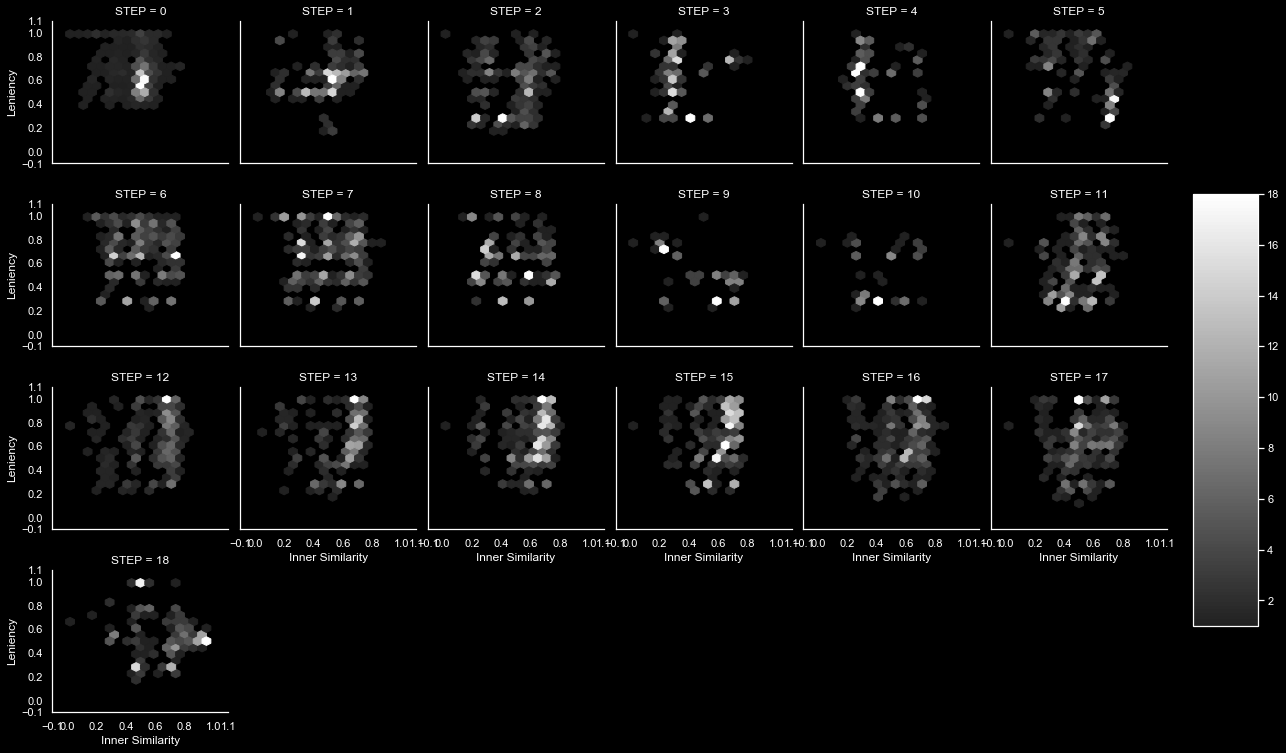

In [183]:
for file in csvFiles:
#     sns.set()
#     sns.set_style("whitegrid", {'axes.grid' : False})
    sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'axes.grid' : False})
    plt.rcParams['text.color'] = "white"
    plt.rcParams['axes.labelcolor'] = "white"
    plt.rcParams['xtick.color'] = "white"
    plt.rcParams['ytick.color'] = "white"

    dirName = file.split(".")[0]
    #read the csv, remove every row that have a missing value (i.e. NaN) and round the floats
    num_data = pd.read_csv(CSVFilesDirectory + file, sep=';')
    num_data = num_data[pd.notnull(num_data['Leniency'])]
    num_data = num_data.round(2)
    num_data = num_data.drop(columns=['Score'])
    num_data['Leniency'][num_data['Leniency'] >= 1.0] = 1.0
    
    ##DIMENSIONS USED!! -- must change this!" "
    x_var = getDimensionName(num_data['DIM X'][0])
    y_var = getDimensionName(num_data['DIM Y'][0])
    
    print(x_var)
    print(y_var)
    
#     with sns.axes_style("dark"):
    plt.figure(figsize=(50, 50))
#    fitness_figure = sns.relplot(x="Linearity", y="Leniency", col="STEP", col_wrap=5, data=num_data)
#    fitness_figure = sns.PairGrid(num_data, y_vars=["Leniency"], x_vars=["Linearity"], height=4)
    fitness_figure = sns.FacetGrid(num_data, col="STEP", col_wrap=6)
        #fitness_figure.map(plt.scatter);
        
        #fitness_figure = fitness_figure.map(plt.scatter, edgecolor="w", s=40)
    #fitness_figure.map(plt.hexbin, "Similarity", "Fitness");
#     fitness_figure = fitness_figure.map(plt.scatter, edgecolor="w", s=40)
    fitness_figure.map(hexbin, x_var, "Leniency", min_series=num_data.min(), max_series=num_data.max(), color="gray")
    #fitness_figure.map(hexbin, min_series=num_data.min(), max_series=num_data.max(), color="gray", alpha=0.5)
    #plt.subplots_adjust(hspace=0.9, left=0.2, right=0.93)
    plt.subplots_adjust(left=0.07, right=0.93, top=0.9, bottom=0.1)  # shrink fig so cbar is visible
    cbar_ax = fitness_figure.fig.add_axes([.95, .2, .05, .5])  # x, y, width, height
    plt.colorbar(cax=cbar_ax)
#     plt.gca().set_facecolor('xkcd:salmon')
    
    #fitness_figure = fitness_figure.map(sns.kdeplot, cmap="Blues_d")
    fitness_figure.set(ylim=(-0.1, 1.1), yticks=[-0.1, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.1]);
    fitness_figure.set(xlim=(-0.1, 1.1), xticks=[-0.1, 0.0, 0.2, 0.4, 0.6, 0.8, 1.0, 1.1]);
    
#     fitness_figure.savefig('../../../../my-data/expressive-range/copy/nya/_LEN-LIN_' + dirName + ".png")
#     fitness_figure.savefig(savePlotsDirectory + '_LEN-LIN_' + dirName + ".png")
    break